# Tema 1 ML - Paunoiu Darius Alexandru

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display, Latex, HTML

# Assuming df is your DataFrame after loading the CSV
statistics_df = pd.read_csv("date_tema_1_iaut_2024.csv")
pd.set_option("display.max_columns", None)

RANDOM_STATES = [42, 10, 15, 21, 13, 30, 35, 37, 45, 53]
RANDOM_STATE = RANDOM_STATES[0]
SCORERS_NAMES = ["accuracy", "f1", "precision", "recall"]

# List of categorical columns you mentioned
def prelucrate_data(df):
    df["Sedentary_hours_daily"] = (
        df["Sedentary_hours_daily"].str.replace(",", ".").astype(float)
    )
    df["Age"] = df["Age"].str.replace(",", ".").astype(float).astype(int)
    df["Est_avg_calorie_intake"] = df["Est_avg_calorie_intake"].astype(int)
    df["Height"] = df["Height"].str.replace(",", ".").astype(float)
    df["Water_daily"] = df["Water_daily"].str.replace(",", ".").astype(float)
    df["Weight"] = df["Weight"].str.replace(",", ".").astype(float)
    df["Physical_activity_level"] = (
        df["Physical_activity_level"].str.replace(",", ".").astype(float)
    )
    df["Technology_time_use"] = df["Technology_time_use"].astype(object)
    df["Main_meals_daily"] = (
        df["Main_meals_daily"]
        .str.replace(",", ".")
        .astype(float)
        .astype(int)
        .astype(object)
    )
    df["Regular_fiber_diet"] = (
        df["Regular_fiber_diet"].str.replace(",", ".").astype(float).astype(int)
    )


def bold_extreme_values(df):
    for idx, column in enumerate(df.columns):
        if idx == 0:
            continue  # Skip the first column
        if column.endswith('std'):
            # Apply bold formatting to the minimum value in 'std' columns
            min_val = df[column].min()
            df[column] = df[column].apply(lambda x: f'\\textbf{{{x}}}' if x == min_val else x)
        else:
            # Apply bold formatting to the maximum value in other columns
            max_val = df[column].max()
            df[column] = df[column].apply(lambda x: f'\\textbf{{{x}}}' if x == max_val else x)
    return df

def format_decimals(df):
    for idx, column in enumerate(df.columns):
        if idx == 0:
            continue  # Skip the first column
        if df[column].dtype.kind in 'fi':  # Checks if the column data type is float or int
            df[column] = df[column].round(3)
    return df


def pd_to_latex(df: pd.DataFrame):
    # print(dfs[-1].to_latex(
    #     index=False,  # To not include the DataFrame index as a column in the table
    #     # caption="Comparison of ML Model Performance Metrics",  # The caption to appear above the table in the LaTeX document
    #     # label="tab:model_comparison",  # A label used for referencing the table within the LaTeX document
    #     # position="htbp",  # The preferred positions where the table should be placed in the document ('here', 'top', 'bottom', 'page')
    #     # column_format="|l|l|l|l|",  # The format of the columns: left-aligned with vertical lines between them
    #     # escape=False,  # Disable escaping LaTeX special characters in the DataFrame
    #     # float_format="{:0.4f}".format  # Formats floats to two decimal places
    #     ))
    df = format_decimals(df)

    df = bold_extreme_values(df)
    # Replace _ with space
    df.columns = df.columns.str.replace("_", " ")
    # Also replace _ with space in the index
    # Replace _ with space for rows
    df = df.map(lambda x: x.replace('_', ' ') if isinstance(x, str) else x)

    latex = df.to_latex(
        float_format="{:0.3f}".format,
        caption="Comparison of ML Model Performance Metrics",
        label="tab:model_comparison",
        escape=False,
    )
    ltx = Latex(latex)
    print(latex)


prelucrate_data(statistics_df)
print(statistics_df.info())

# Splitting the DataFrame into train and test datasets
train_df, test_df = train_test_split(statistics_df, test_size=0.2, random_state=42)

# Printing the shapes of the train and test datasets
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

statistics_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transportation                1921 non-null   object 
 1   Regular_fiber_diet            1921 non-null   int64  
 2   Diagnostic_in_family_history  1921 non-null   object 
 3   High_calorie_diet             1921 non-null   object 
 4   Sedentary_hours_daily         1921 non-null   float64
 5   Age                           1921 non-null   int64  
 6   Alcohol                       1921 non-null   object 
 7   Est_avg_calorie_intake        1921 non-null   int64  
 8   Main_meals_daily              1921 non-null   object 
 9   Snacks                        1921 non-null   object 
 10  Height                        1921 non-null   float64
 11  Smoker                        1921 non-null   object 
 12  Water_daily                   1921 non-null   float64
 13  Cal

,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
1916,Public_Transportation,3,yes,yes,3.08,20,Sometimes,2744,3,Sometimes,1.71,no,1.728139,no,131.408528,1.676269,1,Female,D6
1917,Public_Transportation,3,yes,yes,3.00,21,Sometimes,2977,3,Sometimes,1.75,no,2.005130,no,133.742943,1.341390,1,Female,D6
1918,Public_Transportation,3,yes,yes,3.26,22,Sometimes,2422,3,Sometimes,1.75,no,2.054193,no,133.689352,1.414209,1,Female,D6
1919,Public_Transportation,3,yes,yes,3.61,24,Sometimes,2372,3,Sometimes,1.74,no,2.852339,no,133.346641,1.139107,1,Female,D6
1920,Public_Transportation,3,yes,yes,3.83,23,Sometimes,2336,3,Sometimes,1.74,no,2.863513,no,133.472641,1.026452,1,Female,D6


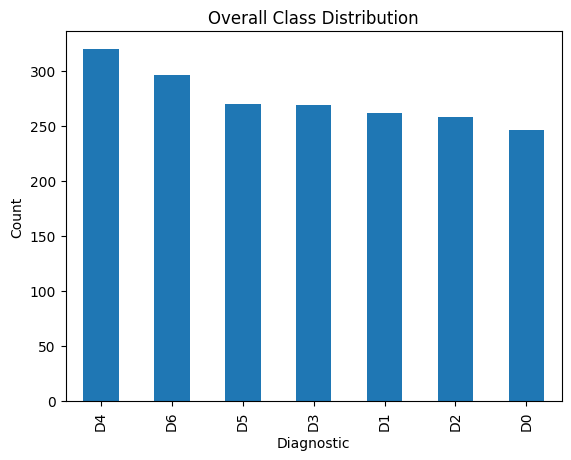

In [142]:
# Class distribution overall
class_counts = statistics_df['Diagnostic'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Overall Class Distribution')
plt.savefig('figs/overall_class_distribution.png', dpi=300)
plt.show()

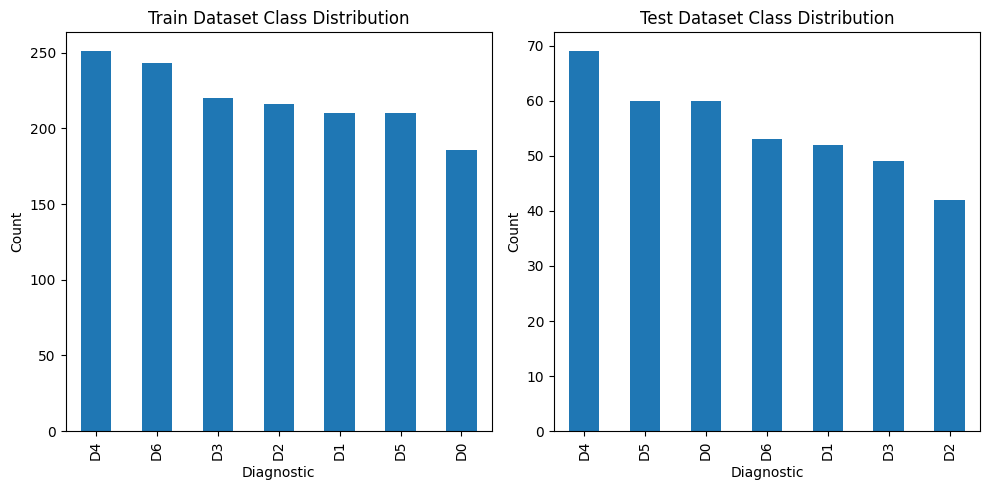

In [143]:
train_class_counts = train_df['Diagnostic'].value_counts()
test_class_counts = test_df['Diagnostic'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_class_counts.plot(kind='bar')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Train Dataset Class Distribution')

plt.subplot(1, 2, 2)
test_class_counts.plot(kind='bar')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Test Dataset Class Distribution')

plt.tight_layout()
plt.savefig('figs/train_test_class_distribution.png', dpi=300)
plt.show()

In [144]:
import pandas as pd
import numpy as np
from scipy.stats import tmean, tstd, median_abs_deviation, iqr, tmin, tmax

# Identify numerical columns
numerical_columns = statistics_df.select_dtypes(include=['int64', 'float64']).columns

# Initialize a dictionary to store the results
results = {}

# Calculate the required statistics for each numerical column
for col in numerical_columns:
    results[col] = {
        'Mean': tmean(statistics_df[col]),
        'Standard Deviation': tstd(statistics_df[col]),
        'Mean Absolute Deviation': np.mean(np.abs(statistics_df[col] - np.mean(statistics_df[col]))),
        'Min': tmin(statistics_df[col]),
        'Max': tmax(statistics_df[col]),
        'Difference between Min and Max': tmax(statistics_df[col]) - tmin(statistics_df[col]),
        'Median': np.median(statistics_df[col]),  # SciPy does not have a median function
        'Median Absolute Deviation': median_abs_deviation(statistics_df[col]),
        'Interquartile Range': iqr(statistics_df[col]),
    }

# Convert the results to a DataFrame
stats_df = pd.DataFrame(results)
display(stats_df.T)
stats_df.columns = stats_df.columns.str.replace('_', ' ')
stats_df = stats_df.T
pd_to_latex(stats_df)


,Mean,Standard Deviation,Mean Absolute Deviation,Min,Max,Difference between Min and Max,Median,Median Absolute Deviation,Interquartile Range
Regular_fiber_diet,3.643415,62.444787,2.847847,1.00,2739.00,2738.00,2.000000,0.000000,1.000000
Sedentary_hours_daily,3.693571,21.759835,1.133885,2.21,956.58,954.37,3.130000,0.440000,0.870000
Age,44.454971,633.322337,40.949876,15.00,19685.00,19670.00,22.000000,3.000000,7.000000
Est_avg_calorie_intake,2253.687663,434.075794,375.362344,1500.00,3000.00,1500.00,2253.000000,380.000000,757.000000
Height,3.573488,58.098160,3.738525,1.45,1915.00,1913.55,1.700000,0.070000,0.140000
Water_daily,2.010367,0.611034,0.470801,1.00,3.00,2.00,2.000000,0.444917,0.874479
Weight,205.637344,3225.653536,254.647671,-1.00,82628.00,82629.00,80.386078,24.386078,46.205365
Physical_activity_level,1.012640,0.855526,0.702160,0.00,3.00,3.00,1.000000,0.815768,1.567523


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{lrllllllll}
\toprule
 & Mean & Standard Deviation & Mean Absolute Deviation & Min & Max & Difference between Min and Max & Median & Median Absolute Deviation & Interquartile Range \\
\midrule
Regular fiber diet & 3.643 & 62.445 & 2.848 & 1.000 & 2739.000 & 2738.000 & 2.000 & 0.000 & 1.000 \\
Sedentary hours daily & 3.694 & 21.760 & 1.134 & 2.210 & 956.580 & 954.370 & 3.130 & 0.440 & 0.870 \\
Age & 44.455 & 633.322 & 40.950 & 15.000 & 19685.000 & 19670.000 & 22.000 & 3.000 & 7.000 \\
Est avg calorie intake & 2253.688 & 434.076 & \textbf{375.362} & \textbf{1500.0} & 3000.000 & 1500.000 & \textbf{2253.0} & \textbf{380.0} & \textbf{757.0} \\
Height & 3.573 & 58.098 & 3.739 & 1.450 & 1915.000 & 1913.550 & 1.700 & 0.070 & 0.140 \\
Water daily & 2.010 & 0.611 & 0.471 & 1.000 & 3.000 & 2.000 & 2.000 & 0.445 & 0.874 \\
Weight & 205.637 & \textbf{3225.654} & 254.648 & -1.000 & \textbf{

Index(['Transportation', 'Diagnostic_in_family_history', 'High_calorie_diet',
       'Alcohol', 'Main_meals_daily', 'Snacks', 'Smoker', 'Calorie_monitoring',
       'Technology_time_use', 'Gender', 'Diagnostic'],
      dtype='object')
                              Unique Count
Transportation                           5
Diagnostic_in_family_history             2
High_calorie_diet                        2
Alcohol                                  4
Main_meals_daily                         4
Snacks                                   4
Smoker                                   2
Calorie_monitoring                       2
Technology_time_use                      4
Gender                                   2
Diagnostic                               7


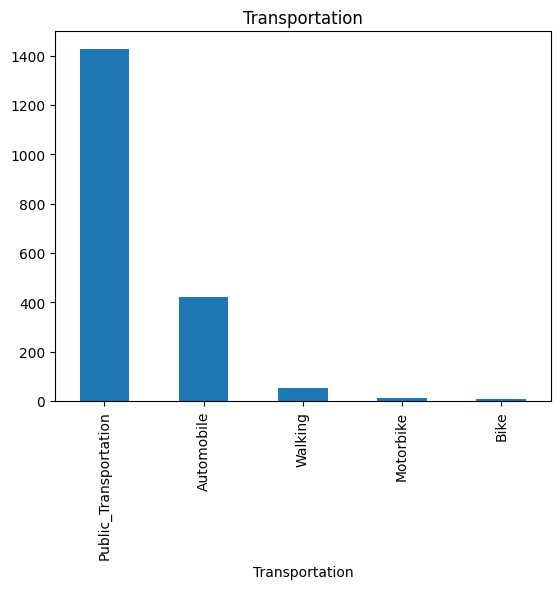

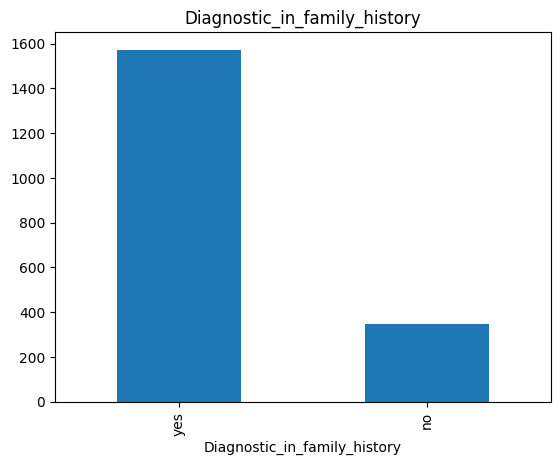

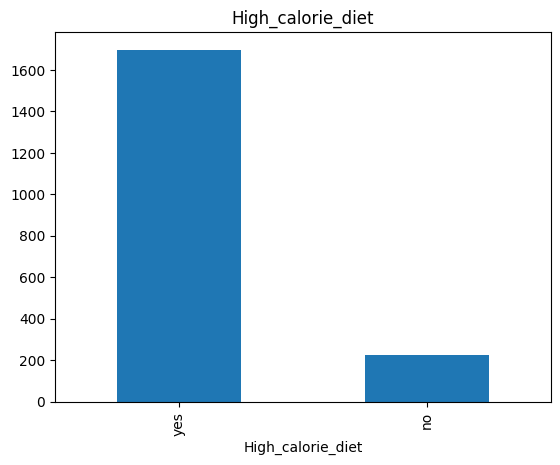

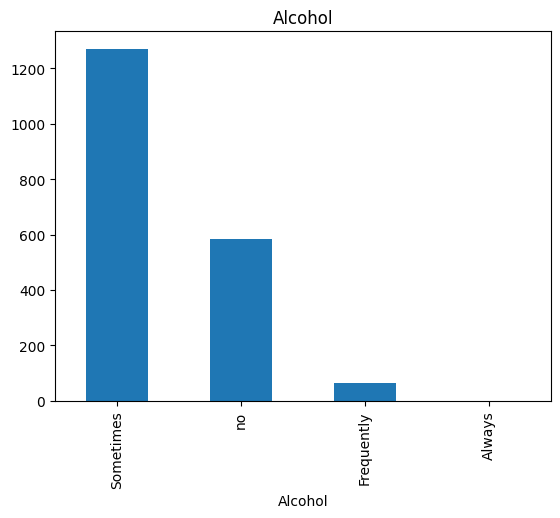

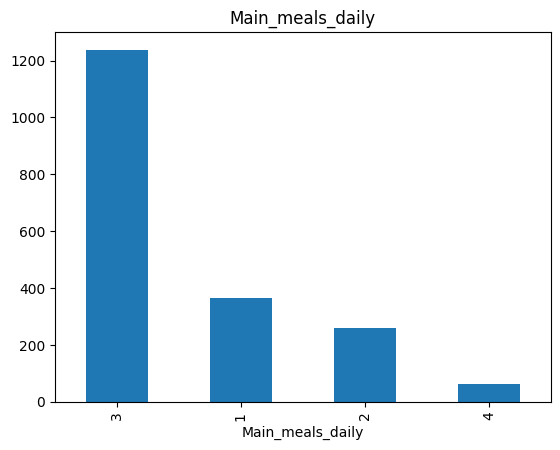

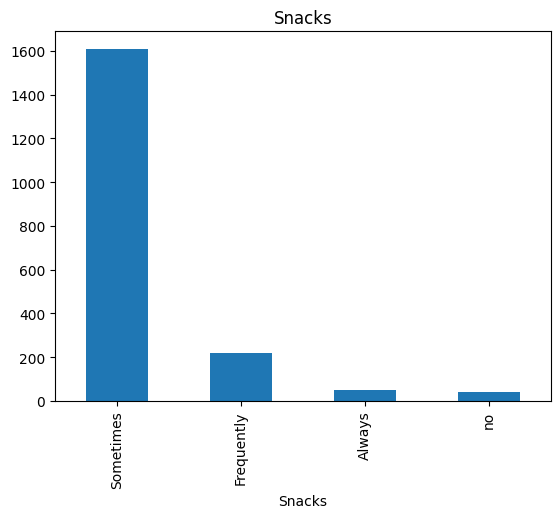

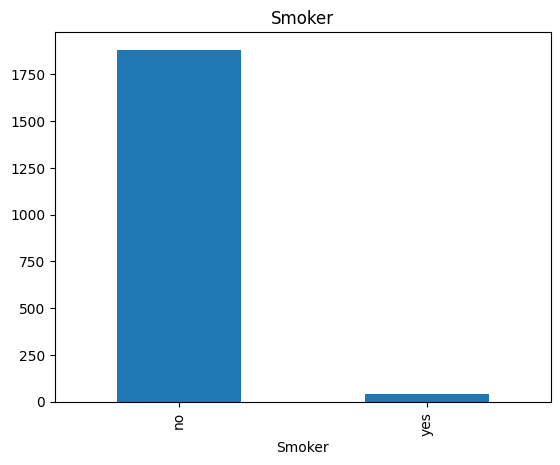

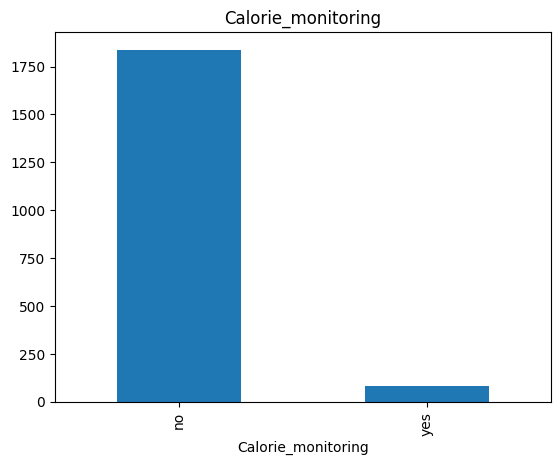

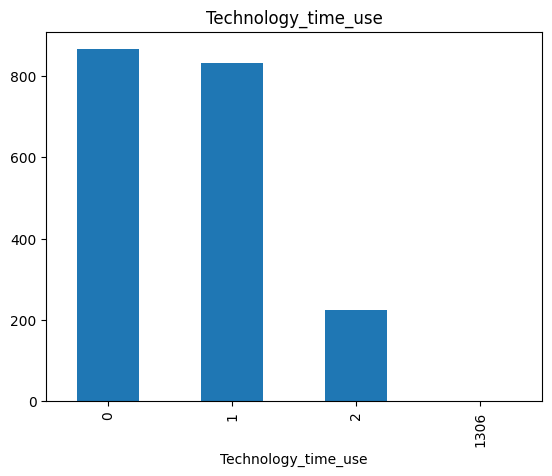

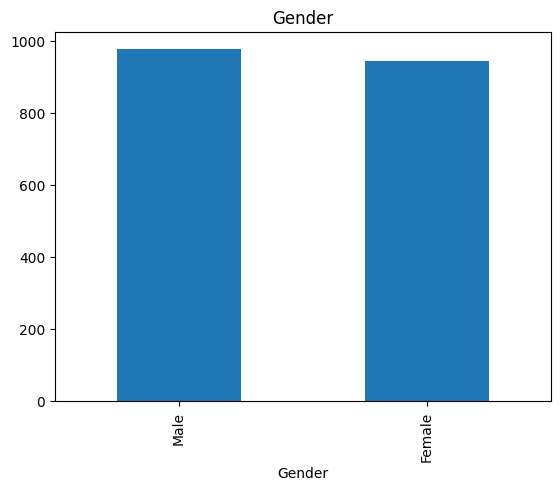

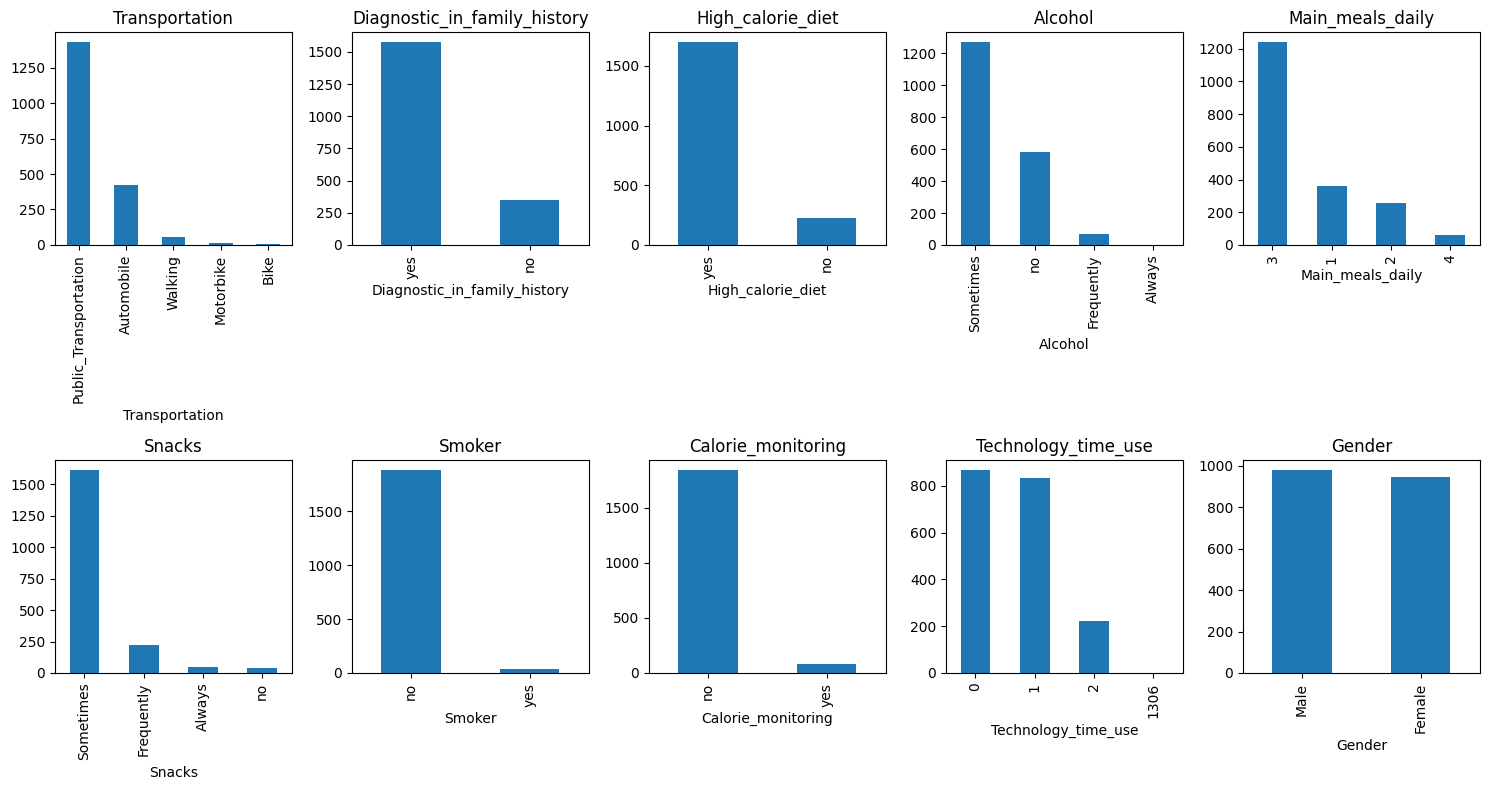

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify discrete, nominal or ordinal columns
categorical_columns = statistics_df.select_dtypes(include=['object', 'category', 'int8']).columns
print(categorical_columns)
# Initialize a dictionary to store the results
results = {}

# Calculate the count of unique values for each column
for col in categorical_columns:
    results[col] = statistics_df[col].nunique()

# Convert the results to a DataFrame
unique_counts_df = pd.DataFrame.from_dict(results, orient='index', columns=['Unique Count'])

# Display the DataFrame
print(unique_counts_df)

# Plot a histogram for each column
for col in categorical_columns:
    if col == 'Diagnostic':
        continue
    statistics_df[col].value_counts().plot(kind='bar', title=col)
    plt.savefig(f'figs/{col}_histogram.png', dpi=300)
    plt.show()


fig, axs = plt.subplots(2, 5, figsize=(15, 8))

for i, col in enumerate(categorical_columns):
    if col == 'Diagnostic':
        continue
    ax = axs[i // 5, i % 5]
    statistics_df[col].value_counts().plot(kind='bar', title=col, ax=ax)

plt.tight_layout()
plt.savefig('figs/multiplot_histogram.png', dpi=300)
plt.show()

In [146]:
import pandas as pd
from IPython.display import display

for column in statistics_df.columns:
    if statistics_df[column].dtype == 'object':
        statistics_df[column] = statistics_df[column].astype('category').cat.codes

cov_attributes = statistics_df.cov()
display(cov_attributes)
variances = cov_attributes.var()

important_attributes = variances.nlargest(10)  # Change 10 to the number of attributes you want
print(important_attributes)
# Number of columns in the DataFrame
num_cols = cov_attributes.shape[1]

# Split the DataFrame into two halves
cov_attributes_first_half = cov_attributes.iloc[:, :num_cols//2]
cov_attributes_second_half = cov_attributes.iloc[:, num_cols//2:]

display(cov_attributes_first_half)
pd_to_latex(cov_attributes_first_half)


display(cov_attributes_second_half)
pd_to_latex(cov_attributes_second_half)


,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
Transportation,1.613173,1.009103,-0.048862,-0.029535,0.422834,8.382093,-0.015630,8.080411,-0.001890,-0.026046,1.200332,-0.001645,0.040653,0.008656,8.296457e+01,0.013698,0.146976,-0.087938,0.031402
Regular_fiber_diet,1.009103,3899.351427,0.261411,0.153711,-1.952158,-36.575700,-0.411274,-409.969245,-0.671756,0.175675,-2.841657,-0.026946,-0.227551,-0.052814,-1.454055e+02,0.113564,-0.986384,0.603846,2.925678
Diagnostic_in_family_history,-0.048862,0.261411,0.148416,0.024699,0.094913,4.174651,0.006592,-6.864424,0.015612,0.031439,0.347992,0.000649,0.036532,-0.012481,2.777532e+01,-0.017956,0.006897,0.019265,0.385575
High_calorie_diet,-0.029535,0.153711,0.024699,0.103063,0.071932,2.496830,-0.014435,2.786477,-0.005995,0.021901,0.223678,-0.002779,0.002342,-0.012147,1.686162e+01,-0.029297,0.013275,0.010898,0.154993
Sedentary_hours_daily,0.422834,-1.952158,0.094913,0.071932,473.490415,-12.924928,0.376236,273.718418,-0.735790,0.062952,-0.587676,-0.009673,-0.071017,-0.023988,1.916370e+01,-0.476095,1.494694,-0.252078,-0.637862
Age,8.382093,-36.575700,4.174651,2.496830,-12.924928,401097.182477,-5.632406,-84.411467,9.385148,3.126387,-34.975499,-0.338645,10.451026,-1.008210,-2.773142e+03,19.995552,-4.699622,10.209111,-19.515486
Alcohol,-0.015630,-0.411274,0.006592,-0.014435,0.376236,-5.632406,0.268677,-0.293501,-0.053053,-0.011072,-0.510293,-0.006128,-0.031022,-0.000697,4.909831e+01,0.036450,0.013008,0.002635,-0.154355
Est_avg_calorie_intake,8.080411,-409.969245,-6.864424,2.786477,273.718418,-84.411467,-0.293501,188421.795103,-4.490091,0.611156,-930.357530,-2.613285,-4.249024,-1.236498,-2.045723e+04,-1.738810,3.180425,-5.736378,-32.980618
Main_meals_daily,-0.001890,-0.671756,0.015612,-0.005995,-0.735790,9.385148,-0.053053,-4.490091,0.692437,-0.045057,0.915565,0.004791,0.038445,0.002519,-2.121321e+01,0.086682,0.019951,0.011937,0.081474
Snacks,-0.026046,0.175675,0.031439,0.021901,0.062952,3.126387,-0.011072,0.611156,-0.045057,0.217145,0.269326,-0.004320,0.043916,-0.010501,2.154517e+01,-0.010111,-0.013616,0.021538,0.301313


Weight                    5.699370e+12
Age                       8.474530e+09
Est_avg_calorie_intake    1.914368e+09
Regular_fiber_diet        8.233589e+05
Height                    6.684452e+05
Sedentary_hours_daily     1.499751e+04
Diagnostic                7.898953e+02
Transportation            3.587744e+02
Alcohol                   1.304060e+02
Technology_time_use       8.629790e+01
dtype: float64


,Transportation,Regular_fiber_diet,Diagnostic_in_family_history,High_calorie_diet,Sedentary_hours_daily,Age,Alcohol,Est_avg_calorie_intake,Main_meals_daily
Transportation,1.613173,1.009103,-0.048862,-0.029535,0.422834,8.382093,-0.015630,8.080411,-0.001890
Regular_fiber_diet,1.009103,3899.351427,0.261411,0.153711,-1.952158,-36.575700,-0.411274,-409.969245,-0.671756
Diagnostic_in_family_history,-0.048862,0.261411,0.148416,0.024699,0.094913,4.174651,0.006592,-6.864424,0.015612
High_calorie_diet,-0.029535,0.153711,0.024699,0.103063,0.071932,2.496830,-0.014435,2.786477,-0.005995
Sedentary_hours_daily,0.422834,-1.952158,0.094913,0.071932,473.490415,-12.924928,0.376236,273.718418,-0.735790
Age,8.382093,-36.575700,4.174651,2.496830,-12.924928,401097.182477,-5.632406,-84.411467,9.385148
Alcohol,-0.015630,-0.411274,0.006592,-0.014435,0.376236,-5.632406,0.268677,-0.293501,-0.053053
Est_avg_calorie_intake,8.080411,-409.969245,-6.864424,2.786477,273.718418,-84.411467,-0.293501,188421.795103,-4.490091
Main_meals_daily,-0.001890,-0.671756,0.015612,-0.005995,-0.735790,9.385148,-0.053053,-4.490091,0.692437
Snacks,-0.026046,0.175675,0.031439,0.021901,0.062952,3.126387,-0.011072,0.611156,-0.045057


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{lrllllllll}
\toprule
 & Transportation & Regular fiber diet & Diagnostic in family history & High calorie diet & Sedentary hours daily & Age & Alcohol & Est avg calorie intake & Main meals daily \\
\midrule
Transportation & 1.613 & 1.009 & -0.049 & -0.030 & 0.423 & 8.382 & -0.016 & 8.080 & -0.002 \\
Regular_fiber_diet & 1.009 & \textbf{3899.351} & 0.261 & 0.154 & -1.952 & -36.576 & -0.411 & -409.969 & -0.672 \\
Diagnostic_in_family_history & -0.049 & 0.261 & 0.148 & 0.025 & 0.095 & 4.175 & 0.007 & -6.864 & 0.016 \\
High_calorie_diet & -0.030 & 0.154 & 0.025 & 0.103 & 0.072 & 2.497 & -0.014 & 2.786 & -0.006 \\
Sedentary_hours_daily & 0.423 & -1.952 & 0.095 & 0.072 & \textbf{473.49} & -12.925 & 0.376 & 273.718 & -0.736 \\
Age & 8.382 & -36.576 & 4.175 & 2.497 & -12.925 & \textbf{401097.182} & -5.632 & -84.411 & \textbf{9.385} \\
Alcohol & -0.016 & -0.411 & 0.007 & -0.014 & 0.37

/tmp/ipykernel_4702/770483752.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].round(3)
/tmp/ipykernel_4702/770483752.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: f'\\textbf{{{x}}}' if x == max_val else x)


,Snacks,Height,Smoker,Water_daily,Calorie_monitoring,Weight,Physical_activity_level,Technology_time_use,Gender,Diagnostic
Transportation,-0.026046,1.200332,-0.001645,0.040653,0.008656,8.296457e+01,0.013698,0.146976,-0.087938,0.031402
Regular_fiber_diet,0.175675,-2.841657,-0.026946,-0.227551,-0.052814,-1.454055e+02,0.113564,-0.986384,0.603846,2.925678
Diagnostic_in_family_history,0.031439,0.347992,0.000649,0.036532,-0.012481,2.777532e+01,-0.017956,0.006897,0.019265,0.385575
High_calorie_diet,0.021901,0.223678,-0.002779,0.002342,-0.012147,1.686162e+01,-0.029297,0.013275,0.010898,0.154993
Sedentary_hours_daily,0.062952,-0.587676,-0.009673,-0.071017,-0.023988,1.916370e+01,-0.476095,1.494694,-0.252078,-0.637862
Age,3.126387,-34.975499,-0.338645,10.451026,-1.008210,-2.773142e+03,19.995552,-4.699622,10.209111,-19.515486
Alcohol,-0.011072,-0.510293,-0.006128,-0.031022,-0.000697,4.909831e+01,0.036450,0.013008,0.002635,-0.154355
Est_avg_calorie_intake,0.611156,-930.357530,-2.613285,-4.249024,-1.236498,-2.045723e+04,-1.738810,3.180425,-5.736378,-32.980618
Main_meals_daily,-0.045057,0.915565,0.004791,0.038445,0.002519,-2.121321e+01,0.086682,0.019951,0.011937,0.081474
Snacks,0.217145,0.269326,-0.004320,0.043916,-0.010501,2.154517e+01,-0.010111,-0.013616,0.021538,0.301313


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{lrlllllllll}
\toprule
 & Snacks & Height & Smoker & Water daily & Calorie monitoring & Weight & Physical activity level & Technology time use & Gender & Diagnostic \\
\midrule
Transportation & -0.026 & 1.200 & -0.002 & 0.041 & 0.009 & 82.965 & 0.014 & 0.147 & -0.088 & 0.031 \\
Regular_fiber_diet & 0.176 & -2.842 & -0.027 & -0.228 & -0.053 & -145.406 & 0.114 & -0.986 & 0.604 & 2.926 \\
Diagnostic_in_family_history & 0.031 & 0.348 & 0.001 & 0.037 & -0.012 & 27.775 & -0.018 & 0.007 & 0.019 & 0.386 \\
High_calorie_diet & 0.022 & 0.224 & -0.003 & 0.002 & -0.012 & 16.862 & -0.029 & 0.013 & 0.011 & 0.155 \\
Sedentary_hours_daily & 0.063 & -0.588 & -0.010 & -0.071 & -0.024 & 19.164 & -0.476 & 1.495 & -0.252 & -0.638 \\
Age & 3.126 & -34.975 & -0.339 & \textbf{10.451} & -1.008 & -2773.142 & \textbf{19.996} & -4.700 & \textbf{10.209} & -19.515 \\
Alcohol & -0.011 & -0.510 & -0.006 & -0

/tmp/ipykernel_4702/770483752.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].round(3)
/tmp/ipykernel_4702/770483752.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: f'\\textbf{{{x}}}' if x == max_val else x)


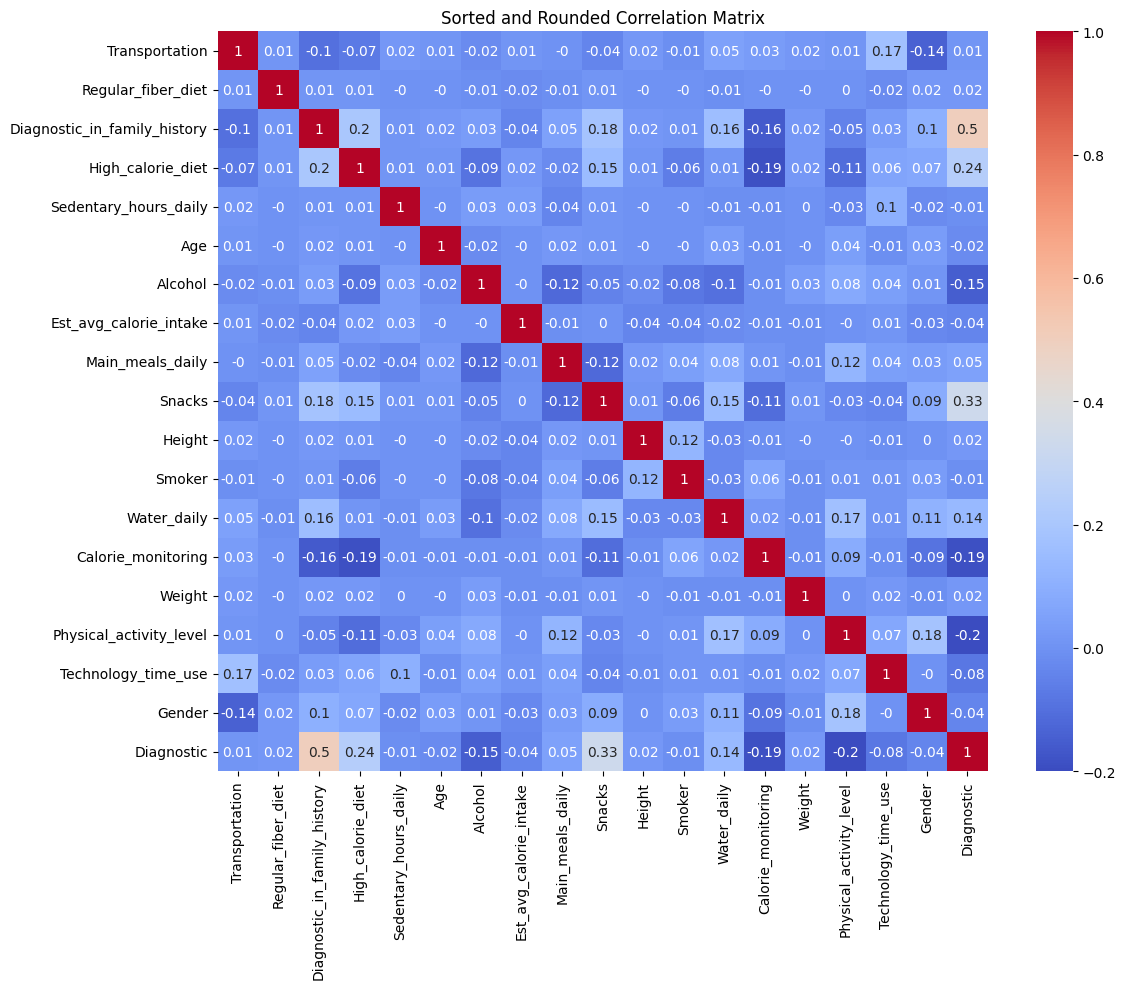

In [147]:
import seaborn as sns
correlation_matrix = statistics_df.corr()

# Round the values to a maximum of 3 decimals
rounded_corr_matrix = correlation_matrix.round(2)

# Create a heatmap of the sorted and rounded correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(rounded_corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Sorted and Rounded Correlation Matrix')

# Display the heatmap
plt.tight_layout()
plt.savefig(f"figs/correlation_matrix.png", dpi=300)
plt.show()


In [148]:
import ast
from sklearn.base import ClassifierMixin
from sklearn.discriminant_analysis import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.preprocessing import (
    LabelEncoder,
    Normalizer,
    QuantileTransformer,
    RobustScaler,
)
from sklearn.feature_selection import (
    SelectPercentile,
    VarianceThreshold,
    chi2,
    f_classif,
)
from sklearn.model_selection import GridSearchCV

from matplotlib.backends.backend_pdf import PdfPages


def prepare_dataset():
    df = pd.read_csv("date_tema_1_iaut_2024.csv")
    prelucrate_data(df)
    # Replace -1 with NaN in the 'Weight' column
    df["Weight"] = df["Weight"].replace(-1, np.nan)
    # df['Age'] = df['Age'].mask(df['Age'] >= 100)
    # Initialize the IterativeImputer
    imputer = IterativeImputer()

    # Perform the imputation on the 'Weight' column
    numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
    df = df.replace(-1, np.nan)
    df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

    # Convert categorical columns to numerical
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])

    X = df.drop("Diagnostic", axis=1)
    y = df["Diagnostic"]

    # Create a VarianceThreshold object
    selector = VarianceThreshold(threshold=0.1)

    # Fit and transform the selector to the data
    features_before = X.columns
    X = pd.DataFrame(
        selector.fit_transform(X), columns=X.columns[selector.get_support()]
    )
    print(f"Features removed: {set(features_before) - set(X.columns)}")

    # Create a SelectPercentile object
    selector = SelectPercentile(f_classif, percentile=90)

    # Fit and transform the selector to the data
    features_before = X.columns
    X = pd.DataFrame(
        selector.fit_transform(X, y), columns=X.columns[selector.get_support()]
    )
    print(f"Features removed: {set(features_before) - set(X.columns)}")

    # Quantile transformer
    transformer = QuantileTransformer()
    X = transformer.fit_transform(X, y)

    # Standardize the features
    scaler = RobustScaler()
    X = scaler.fit_transform(X, y)
    return X, y


def find_best_params(classifier, param_grid, X, y, random_state=42):

    # Create train test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Convert the custom scorer into a scorer that can be used with GridSearchCV

    scorers = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score, average="weighted"),
        "recall": make_scorer(recall_score, average="weighted"),
        "f1": make_scorer(f1_score, average="weighted"),
    }

    def accuracy_score_specific_class(y_true, y_pred, *, class_label):
        return accuracy_score(y_true == class_label, y_pred == class_label)

    def f1_score_specific_class(y_true, y_pred, *, class_label):
        return f1_score(y_true, y_pred, labels=[class_label], average=None)[0]

    def precision_score_specific_class(y_true, y_pred, *, class_label):
        return precision_score(y_true, y_pred, labels=[class_label], average=None)[0]

    def recall_score_specific_class(y_true, y_pred, *, class_label):
        return recall_score(y_true, y_pred, labels=[class_label], average=None)[0]

    for class_label in np.unique(y):
        scorers[f"accuracy_D{class_label}"] = make_scorer(
            accuracy_score_specific_class,
            class_label=class_label,
        )

    for class_label in np.unique(y):
        scorers[f"f1_D{class_label}"] = make_scorer(
            f1_score_specific_class,
            class_label=class_label,
        )

    for class_label in np.unique(y):
        scorers[f"precision_D{class_label}"] = make_scorer(
            precision_score_specific_class,
            class_label=class_label,
        )
    for class_label in np.unique(y):
        scorers[f"recall_D{class_label}"] = make_scorer(
            recall_score_specific_class,
            class_label=class_label,
        )

    # Initialize a GridSearchCV
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        cv=5,
        scoring=scorers,
        refit="f1",
        n_jobs=4,
    )
    # Fit the GridSearchCV to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best parameters found: ", grid_search.best_params_)

    return grid_search, grid_search.best_params_




def evaluate_my_model(
    model: ClassifierMixin, grid_search: GridSearchCV, X, y, random_state=42
):
    print(f"Model: {model.__class__.__name__}")
    # Create a DataFrame from cv_results_
    df = pd.DataFrame(grid_search.cv_results_)

    columns = [
        "params",
        "mean_test_accuracy",
        "std_test_accuracy",
        "mean_test_precision",
        "std_test_precision",
        "mean_test_recall",
        "std_test_recall",
        "mean_test_f1",
        "std_test_f1",
    ]
    for scr in SCORERS_NAMES:
        for class_label in np.unique(y):
            columns.append(f"mean_test_{scr}_D{class_label}")
            columns.append(f"std_test_{scr}_D{class_label}")
    # Select the columns of interest
    print(df.columns)
    df = df[columns]

    # Rename the columns
    df["params"] = df["params"].apply(lambda x: x.values())
    df["params"] = df["params"].apply(lambda x: list(x))
    df['params'] = df['params'].apply(lambda x: f"{','.join(map(str, x))}")

    rename_params_to = ",".join([x for x in grid_search.best_params_])
    df = df.rename(columns={"params": rename_params_to})

    # Highlight the row with the best parameters

    dfs = []
    for class_label in np.unique(y):
        cols = [rename_params_to]
        for scr in SCORERS_NAMES:
            cols.append(f"mean_test_{scr}_D{class_label}")
            cols.append(f"std_test_{scr}_D{class_label}")
        dfs.append(df[cols])
        renamed_cols = [rename_params_to]
        for scr in SCORERS_NAMES:
            renamed_cols.append(f"{scr}_D{class_label}")
            renamed_cols.append(f"{scr}_D{class_label}_std")
        dfs[-1].columns = renamed_cols

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    print(
        classification_report(
            y_test, y_pred, target_names=["D0", "D1", "D2", "D3", "D4", "D5", "D6"]
        )
    )

    # Confusion matrix
    def plot_confusion_matrix(cm, classes, model: RandomForestClassifier):
        df_cm = pd.DataFrame(cm, index=classes, columns=classes)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
        plt.title("Confusion Matrix")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.savefig(f"figs/confusion_matrix_{model.__class__.__name__}.png", dpi=300)
        plt.show()

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ["D0", "D1", "D2", "D3", "D4", "D5", "D6"], model)

    return accuracy, f1, precision, recall, dfs

In [149]:
# Initialize a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'max_samples': [0.5, 0.7, 1.0],
}
X, y = prepare_dataset()
grid_search, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)

Features removed: {'Smoker', 'Calorie_monitoring'}
Features removed: {'Sedentary_hours_daily', 'Est_avg_calorie_intake'}
Best parameters found:  {'max_depth': 20, 'max_samples': 1.0, 'n_estimators': 200}


Model: RandomForestClassifier
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_samples', 'param_n_estimators', 'params',
       'split0_test_accuracy', 'split1_test_accuracy',
       ...
       'std_test_recall_D5', 'rank_test_recall_D5', 'split0_test_recall_D6',
       'split1_test_recall_D6', 'split2_test_recall_D6',
       'split3_test_recall_D6', 'split4_test_recall_D6', 'mean_test_recall_D6',
       'std_test_recall_D6', 'rank_test_recall_D6'],
      dtype='object', length=264)
              precision    recall  f1-score   support

          D0       0.96      0.80      0.87        60
          D1       0.75      0.87      0.80        52
          D2       0.88      0.88      0.88        42
          D3       0.90      0.90      0.90        49
          D4       0.95      0.88      0.92        69
          D5       0.91      1.00      0.95        60
          D6       0.96      0.98      0.97        53

    accuracy 

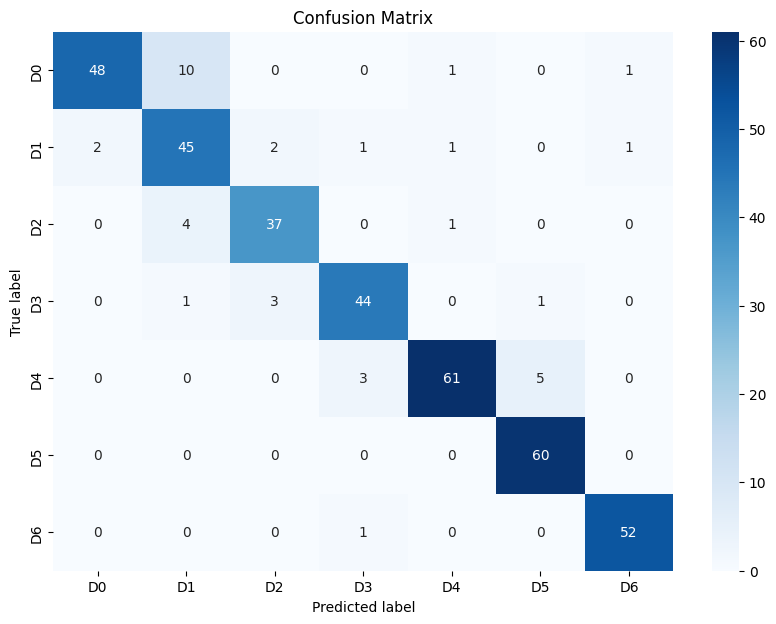

In [150]:
best_clf = RandomForestClassifier(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall, dfs = evaluate_my_model(best_clf, grid_search, X, y, RANDOM_STATE)

In [151]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(grid_search.best_index_)
for df in dfs:
    # Replace the dictionary values with list
    display(df)
    pd_to_latex(df)

Accuracy: 0.9012987012987013
F1 Score: 0.9015570378350735
Precision: 0.9063587443701079
Recall: 0.9012987012987013
17


,"max_depth,max_samples,n_estimators",accuracy_D0,accuracy_D0_std,f1_D0,f1_D0_std,precision_D0,precision_D0_std,recall_D0,recall_D0_std
0,"15,0.5,100",0.986332,0.005958,0.942906,0.024680,0.956148,0.027508,0.930299,0.026794
1,"15,0.5,150",0.988286,0.004396,0.950829,0.018329,0.966658,0.011118,0.935704,0.026679
2,"15,0.5,200",0.988286,0.004396,0.950829,0.018329,0.966658,0.011118,0.935704,0.026679
3,"15,0.7,100",0.989587,0.003782,0.956010,0.016082,0.977610,0.011209,0.935704,0.026679
4,"15,0.7,150",0.988284,0.003896,0.950828,0.016454,0.967093,0.020149,0.935704,0.026679
5,"15,0.7,200",0.987633,0.005597,0.948015,0.023308,0.966800,0.026333,0.930299,0.026794
6,"15,1.0,100",0.985680,0.003892,0.939781,0.016627,0.955814,0.012786,0.924893,0.030949
7,"15,1.0,150",0.985680,0.004862,0.939924,0.020499,0.956361,0.026697,0.924893,0.030949
8,"15,1.0,200",0.987635,0.004300,0.947937,0.017964,0.966499,0.011042,0.930299,0.026794
9,"20,0.5,100",0.984378,0.005595,0.934391,0.023470,0.949991,0.020784,0.919488,0.029105


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D0 & accuracy D0 std & f1 D0 & f1 D0 std & precision D0 & precision D0 std & recall D0 & recall D0 std \\
\midrule
0 & 15,0.5,100 & 0.986 & 0.006 & 0.943 & 0.025 & 0.956 & 0.028 & 0.930 & \textbf{0.027} \\
1 & 15,0.5,150 & 0.988 & 0.004 & 0.951 & 0.018 & 0.967 & \textbf{0.011} & \textbf{0.936} & \textbf{0.027} \\
2 & 15,0.5,200 & 0.988 & 0.004 & 0.951 & 0.018 & 0.967 & \textbf{0.011} & \textbf{0.936} & \textbf{0.027} \\
3 & 15,0.7,100 & \textbf{0.99} & 0.004 & \textbf{0.956} & 0.016 & \textbf{0.978} & \textbf{0.011} & \textbf{0.936} & \textbf{0.027} \\
4 & 15,0.7,150 & 0.988 & 0.004 & 0.951 & 0.016 & 0.967 & 0.020 & \textbf{0.936} & \textbf{0.027} \\
5 & 15,0.7,200 & 0.988 & 0.006 & 0.948 & 0.023 & 0.967 & 0.026 & 0.930 & \textbf{0.027} \\
6 & 15,1.0,100 & 0.986 & 0.004 & 0.940 & 0.017 & 0.956 & 0.013 & 0.9

,"max_depth,max_samples,n_estimators",accuracy_D1,accuracy_D1_std,f1_D1,f1_D1_std,precision_D1,precision_D1_std,recall_D1,recall_D1_std
0,"15,0.5,100",0.946612,0.010438,0.811017,0.036335,0.787797,0.043941,0.838095,0.050843
1,"15,0.5,150",0.947910,0.013529,0.816577,0.042993,0.796178,0.067382,0.842857,0.051287
2,"15,0.5,200",0.947912,0.009900,0.817270,0.028478,0.792554,0.054060,0.847619,0.038686
3,"15,0.7,100",0.953118,0.011963,0.837372,0.035078,0.804340,0.056464,0.876190,0.031587
4,"15,0.7,150",0.951170,0.009224,0.830069,0.025221,0.798339,0.049404,0.866667,0.011664
5,"15,0.7,200",0.947914,0.009674,0.820037,0.031609,0.778704,0.036531,0.866667,0.032297
6,"15,1.0,100",0.944004,0.010207,0.802799,0.028210,0.783173,0.061889,0.828571,0.038095
7,"15,1.0,150",0.945306,0.009778,0.807396,0.026090,0.788547,0.063815,0.833333,0.042592
8,"15,1.0,200",0.947910,0.014292,0.818414,0.044698,0.790600,0.067889,0.852381,0.046168
9,"20,0.5,100",0.945306,0.012105,0.808230,0.036992,0.782401,0.055415,0.838095,0.031587


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D1 & accuracy D1 std & f1 D1 & f1 D1 std & precision D1 & precision D1 std & recall D1 & recall D1 std \\
\midrule
0 & 15,0.5,100 & 0.947 & 0.010 & 0.811 & 0.036 & 0.788 & 0.044 & 0.838 & 0.051 \\
1 & 15,0.5,150 & 0.948 & 0.014 & 0.817 & 0.043 & 0.796 & 0.067 & 0.843 & 0.051 \\
2 & 15,0.5,200 & 0.948 & 0.010 & 0.817 & 0.028 & 0.793 & 0.054 & 0.848 & 0.039 \\
3 & 15,0.7,100 & \textbf{0.953} & 0.012 & \textbf{0.837} & 0.035 & \textbf{0.804} & 0.056 & \textbf{0.876} & 0.032 \\
4 & 15,0.7,150 & 0.951 & \textbf{0.009} & 0.830 & \textbf{0.025} & 0.798 & 0.049 & 0.867 & \textbf{0.012} \\
5 & 15,0.7,200 & 0.948 & 0.010 & 0.820 & 0.032 & 0.779 & \textbf{0.037} & 0.867 & 0.032 \\
6 & 15,1.0,100 & 0.944 & 0.010 & 0.803 & 0.028 & 0.783 & 0.062 & 0.829 & 0.038 \\
7 & 15,1.0,150 & 0.945 & 0.010 & 0.807 & 0.026 & 0.789 & 

,"max_depth,max_samples,n_estimators",accuracy_D2,accuracy_D2_std,f1_D2,f1_D2_std,precision_D2,precision_D2_std,recall_D2,recall_D2_std
0,"15,0.5,100",0.957680,0.013826,0.844849,0.054237,0.863083,0.031450,0.828647,0.075963
1,"15,0.5,150",0.960933,0.011107,0.855393,0.044324,0.886325,0.030629,0.828647,0.066876
2,"15,0.5,200",0.958985,0.011760,0.847969,0.047744,0.875896,0.018517,0.823996,0.076009
3,"15,0.7,100",0.963539,0.011913,0.865544,0.046566,0.892213,0.037796,0.842495,0.068226
4,"15,0.7,150",0.964844,0.010782,0.868305,0.042879,0.909163,0.028328,0.833298,0.068107
5,"15,0.7,200",0.962240,0.011393,0.860066,0.044538,0.891558,0.032994,0.833298,0.069677
6,"15,1.0,100",0.965496,0.009791,0.872546,0.038536,0.900840,0.017677,0.847252,0.059829
7,"15,1.0,150",0.965496,0.009347,0.873499,0.035419,0.897041,0.019814,0.851903,0.052032
8,"15,1.0,200",0.962892,0.009570,0.863580,0.037905,0.887194,0.015179,0.842600,0.061315
9,"20,0.5,100",0.959637,0.011758,0.850017,0.047330,0.880696,0.024608,0.823890,0.076179


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D2 & accuracy D2 std & f1 D2 & f1 D2 std & precision D2 & precision D2 std & recall D2 & recall D2 std \\
\midrule
0 & 15,0.5,100 & 0.958 & 0.014 & 0.845 & 0.054 & 0.863 & 0.031 & 0.829 & 0.076 \\
1 & 15,0.5,150 & 0.961 & 0.011 & 0.855 & 0.044 & 0.886 & 0.031 & 0.829 & 0.067 \\
2 & 15,0.5,200 & 0.959 & 0.012 & 0.848 & 0.048 & 0.876 & 0.019 & 0.824 & 0.076 \\
3 & 15,0.7,100 & 0.964 & 0.012 & 0.866 & 0.047 & 0.892 & 0.038 & 0.842 & 0.068 \\
4 & 15,0.7,150 & \textbf{0.965} & 0.011 & 0.868 & 0.043 & \textbf{0.909} & 0.028 & 0.833 & 0.068 \\
5 & 15,0.7,200 & 0.962 & 0.011 & 0.860 & 0.045 & 0.892 & 0.033 & 0.833 & 0.070 \\
6 & 15,1.0,100 & \textbf{0.965} & 0.010 & \textbf{0.873} & 0.039 & 0.901 & 0.018 & 0.847 & 0.060 \\
7 & 15,1.0,150 & \textbf{0.965} & 0.009 & \textbf{0.873} & 0.035 & 0.897 & 0.020 & \textbf{0.

,"max_depth,max_samples,n_estimators",accuracy_D3,accuracy_D3_std,f1_D3,f1_D3_std,precision_D3,precision_D3_std,recall_D3,recall_D3_std
0,"15,0.5,100",0.963548,0.005556,0.867626,0.017521,0.908344,0.042483,0.831818,0.018182
1,"15,0.5,150",0.963545,0.004754,0.868264,0.013858,0.905727,0.048353,0.836364,0.026504
2,"15,0.5,200",0.964195,0.007125,0.869969,0.022412,0.913704,0.052288,0.831818,0.011134
3,"15,0.7,100",0.962894,0.006018,0.866236,0.019693,0.901036,0.051285,0.836364,0.026504
4,"15,0.7,150",0.964846,0.005587,0.874270,0.016888,0.902840,0.052155,0.850000,0.023177
5,"15,0.7,200",0.966801,0.004287,0.879728,0.012742,0.919950,0.048478,0.845455,0.026504
6,"15,1.0,100",0.970705,0.005815,0.894863,0.019890,0.925801,0.046511,0.868182,0.030151
7,"15,1.0,150",0.971357,0.003777,0.896984,0.010829,0.930538,0.044230,0.868182,0.026504
8,"15,1.0,200",0.970707,0.005423,0.895183,0.015667,0.926667,0.052281,0.868182,0.017008
9,"20,0.5,100",0.963543,0.005593,0.868253,0.018036,0.904173,0.041857,0.836364,0.017008


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D3 & accuracy D3 std & f1 D3 & f1 D3 std & precision D3 & precision D3 std & recall D3 & recall D3 std \\
\midrule
0 & 15,0.5,100 & 0.964 & 0.006 & 0.868 & 0.018 & 0.908 & \textbf{0.042} & 0.832 & 0.018 \\
1 & 15,0.5,150 & 0.964 & 0.005 & 0.868 & 0.014 & 0.906 & 0.048 & 0.836 & 0.027 \\
2 & 15,0.5,200 & 0.964 & 0.007 & 0.870 & 0.022 & 0.914 & 0.052 & 0.832 & \textbf{0.011} \\
3 & 15,0.7,100 & 0.963 & 0.006 & 0.866 & 0.020 & 0.901 & 0.051 & 0.836 & 0.027 \\
4 & 15,0.7,150 & 0.965 & 0.006 & 0.874 & 0.017 & 0.903 & 0.052 & 0.850 & 0.023 \\
5 & 15,0.7,200 & 0.967 & \textbf{0.004} & 0.880 & 0.013 & 0.920 & 0.048 & 0.845 & 0.027 \\
6 & 15,1.0,100 & \textbf{0.971} & 0.006 & 0.895 & 0.020 & 0.926 & 0.047 & 0.868 & 0.030 \\
7 & 15,1.0,150 & \textbf{0.971} & \textbf{0.004} & 0.897 & \textbf{0.011} & 0.931 & 0.044 & 0

,"max_depth,max_samples,n_estimators",accuracy_D4,accuracy_D4_std,f1_D4,f1_D4_std,precision_D4,precision_D4_std,recall_D4,recall_D4_std
0,"15,0.5,100",0.975259,0.014065,0.925087,0.041195,0.927242,0.061148,0.924314,0.029358
1,"15,0.5,150",0.975913,0.013444,0.927174,0.039824,0.922871,0.051656,0.932314,0.034769
2,"15,0.5,200",0.975908,0.013607,0.927395,0.039731,0.923570,0.056915,0.932235,0.027203
3,"15,0.7,100",0.974612,0.012926,0.922065,0.039601,0.929067,0.049704,0.916235,0.040933
4,"15,0.7,150",0.976564,0.014180,0.928554,0.042985,0.929546,0.051122,0.928235,0.041254
5,"15,0.7,200",0.975913,0.015902,0.925949,0.049066,0.932932,0.056300,0.920235,0.052246
6,"15,1.0,100",0.979168,0.011393,0.936586,0.034792,0.933008,0.036576,0.940235,0.033470
7,"15,1.0,150",0.978521,0.011383,0.934892,0.034223,0.930082,0.040824,0.940235,0.033470
8,"15,1.0,200",0.980469,0.012361,0.940072,0.037867,0.944069,0.040627,0.936235,0.036689
9,"20,0.5,100",0.975913,0.015497,0.927737,0.045074,0.924176,0.064044,0.932314,0.026997


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D4 & accuracy D4 std & f1 D4 & f1 D4 std & precision D4 & precision D4 std & recall D4 & recall D4 std \\
\midrule
0 & 15,0.5,100 & 0.975 & 0.014 & 0.925 & 0.041 & 0.927 & 0.061 & 0.924 & 0.029 \\
1 & 15,0.5,150 & 0.976 & 0.013 & 0.927 & 0.040 & 0.923 & 0.052 & 0.932 & 0.035 \\
2 & 15,0.5,200 & 0.976 & 0.014 & 0.927 & 0.040 & 0.924 & 0.057 & 0.932 & \textbf{0.027} \\
3 & 15,0.7,100 & 0.975 & 0.013 & 0.922 & 0.040 & 0.929 & 0.050 & 0.916 & 0.041 \\
4 & 15,0.7,150 & 0.977 & 0.014 & 0.929 & 0.043 & 0.930 & 0.051 & 0.928 & 0.041 \\
5 & 15,0.7,200 & 0.976 & 0.016 & 0.926 & 0.049 & 0.933 & 0.056 & 0.920 & 0.052 \\
6 & 15,1.0,100 & 0.979 & 0.011 & 0.937 & 0.035 & 0.933 & 0.037 & \textbf{0.94} & 0.033 \\
7 & 15,1.0,150 & 0.979 & 0.011 & 0.935 & 0.034 & 0.930 & 0.041 & \textbf{0.94} & 0.033 \\
8 & 15,1.0,200 & 0.980

,"max_depth,max_samples,n_estimators",accuracy_D5,accuracy_D5_std,f1_D5,f1_D5_std,precision_D5,precision_D5_std,recall_D5,recall_D5_std
0,"15,0.5,100",0.984380,0.007527,0.944916,0.026420,0.916254,0.036650,0.976190,0.026082
1,"15,0.5,150",0.985031,0.006690,0.947428,0.023078,0.916759,0.036250,0.980952,0.017817
2,"15,0.5,200",0.984380,0.007527,0.944916,0.026420,0.916254,0.036650,0.976190,0.026082
3,"15,0.7,100",0.984380,0.010372,0.945233,0.035774,0.916847,0.048907,0.976190,0.026082
4,"15,0.7,150",0.984380,0.010372,0.945233,0.035774,0.916847,0.048907,0.976190,0.026082
5,"15,0.7,200",0.984380,0.010372,0.945233,0.035774,0.916847,0.048907,0.976190,0.026082
6,"15,1.0,100",0.985029,0.008387,0.947119,0.029371,0.920166,0.037896,0.976190,0.026082
7,"15,1.0,150",0.986332,0.007808,0.951449,0.027615,0.928347,0.035029,0.976190,0.026082
8,"15,1.0,200",0.987635,0.007242,0.956207,0.025228,0.933095,0.035995,0.980952,0.017817
9,"20,0.5,100",0.985683,0.006999,0.949244,0.024626,0.924435,0.034222,0.976190,0.026082


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D5 & accuracy D5 std & f1 D5 & f1 D5 std & precision D5 & precision D5 std & recall D5 & recall D5 std \\
\midrule
0 & 15,0.5,100 & 0.984 & 0.008 & 0.945 & 0.026 & 0.916 & 0.037 & 0.976 & 0.026 \\
1 & 15,0.5,150 & 0.985 & 0.007 & 0.947 & 0.023 & 0.917 & 0.036 & \textbf{0.981} & \textbf{0.018} \\
2 & 15,0.5,200 & 0.984 & 0.008 & 0.945 & 0.026 & 0.916 & 0.037 & 0.976 & 0.026 \\
3 & 15,0.7,100 & 0.984 & 0.010 & 0.945 & 0.036 & 0.917 & 0.049 & 0.976 & 0.026 \\
4 & 15,0.7,150 & 0.984 & 0.010 & 0.945 & 0.036 & 0.917 & 0.049 & 0.976 & 0.026 \\
5 & 15,0.7,200 & 0.984 & 0.010 & 0.945 & 0.036 & 0.917 & 0.049 & 0.976 & 0.026 \\
6 & 15,1.0,100 & 0.985 & 0.008 & 0.947 & 0.029 & 0.920 & 0.038 & 0.976 & 0.026 \\
7 & 15,1.0,150 & 0.986 & 0.008 & 0.951 & 0.028 & 0.928 & 0.035 & 0.976 & 0.026 \\
8 & 15,1.0,200 & \textbf{0.98

,"max_depth,max_samples,n_estimators",accuracy_D6,accuracy_D6_std,f1_D6,f1_D6_std,precision_D6,precision_D6_std,recall_D6,recall_D6_std
0,"15,0.5,100",0.996093,0.003799,0.987796,0.011801,0.980072,0.021483,0.995918,0.008163
1,"15,0.5,150",0.996093,0.003799,0.987796,0.011801,0.980072,0.021483,0.995918,0.008163
2,"15,0.5,200",0.995444,0.003907,0.985776,0.012163,0.976154,0.022950,0.995918,0.008163
3,"15,0.7,100",0.996093,0.003799,0.987796,0.011801,0.980072,0.021483,0.995918,0.008163
4,"15,0.7,150",0.996745,0.002913,0.989775,0.009127,0.983837,0.015012,0.995918,0.008163
5,"15,0.7,200",0.996745,0.002913,0.989775,0.009127,0.983837,0.015012,0.995918,0.008163
6,"15,1.0,100",0.996747,0.002909,0.989775,0.009127,0.984000,0.019596,0.995918,0.008163
7,"15,1.0,150",0.996747,0.002909,0.989775,0.009127,0.984000,0.019596,0.995918,0.008163
8,"15,1.0,200",0.996095,0.003796,0.987796,0.011801,0.980235,0.024928,0.995918,0.008163
9,"20,0.5,100",0.995444,0.003907,0.985776,0.012163,0.976154,0.022950,0.995918,0.008163


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & max depth,max samples,n estimators & accuracy D6 & accuracy D6 std & f1 D6 & f1 D6 std & precision D6 & precision D6 std & recall D6 & recall D6 std \\
\midrule
0 & 15,0.5,100 & 0.996 & 0.004 & 0.988 & 0.012 & 0.980 & 0.021 & \textbf{0.996} & \textbf{0.008} \\
1 & 15,0.5,150 & 0.996 & 0.004 & 0.988 & 0.012 & 0.980 & 0.021 & \textbf{0.996} & \textbf{0.008} \\
2 & 15,0.5,200 & 0.995 & 0.004 & 0.986 & 0.012 & 0.976 & 0.023 & \textbf{0.996} & \textbf{0.008} \\
3 & 15,0.7,100 & 0.996 & 0.004 & 0.988 & 0.012 & 0.980 & 0.021 & \textbf{0.996} & \textbf{0.008} \\
4 & 15,0.7,150 & \textbf{0.997} & 0.003 & 0.990 & 0.009 & 0.984 & \textbf{0.015} & \textbf{0.996} & \textbf{0.008} \\
5 & 15,0.7,200 & \textbf{0.997} & 0.003 & 0.990 & 0.009 & 0.984 & \textbf{0.015} & \textbf{0.996} & \textbf{0.008} \\
6 & 15,1.0,100 & \textbf{0.997} & 0.003 & 0.990 & 0.009 & 0.984 & 0

In [152]:
# Initialize a RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf = ExtraTreesClassifier(random_state=RANDOM_STATE)


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'max_samples': [0.5, 0.7, 1.0],
    'bootstrap': [True]
}
X, y = prepare_dataset()
grid_search, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)

Features removed: {'Smoker', 'Calorie_monitoring'}
Features removed: {'Sedentary_hours_daily', 'Est_avg_calorie_intake'}
Best parameters found:  {'bootstrap': True, 'max_depth': 25, 'max_samples': 1.0, 'n_estimators': 150}


Model: ExtraTreesClassifier
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_max_depth', 'param_max_samples',
       'param_n_estimators', 'params', 'split0_test_accuracy',
       ...
       'std_test_recall_D5', 'rank_test_recall_D5', 'split0_test_recall_D6',
       'split1_test_recall_D6', 'split2_test_recall_D6',
       'split3_test_recall_D6', 'split4_test_recall_D6', 'mean_test_recall_D6',
       'std_test_recall_D6', 'rank_test_recall_D6'],
      dtype='object', length=265)
              precision    recall  f1-score   support

          D0       0.96      0.80      0.87        60
          D1       0.73      0.87      0.79        52
          D2       0.85      0.83      0.84        42
          D3       0.86      0.90      0.88        49
          D4       0.95      0.84      0.89        69
          D5       0.89      0.97      0.93        60
          D6       0.95      0.98      0.96        53

    accuracy        

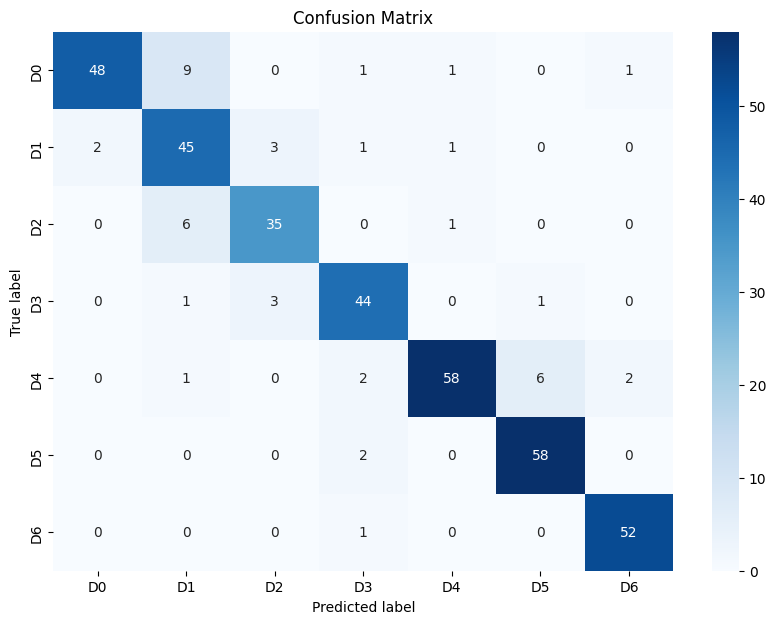

In [153]:
best_clf = ExtraTreesClassifier(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall, dfs = evaluate_my_model(best_clf, grid_search, X, y, RANDOM_STATE)

In [154]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(grid_search.best_index_)
for df in dfs:
    # Replace the dictionary values with list
    display(df)
    pd_to_latex(df)

Accuracy: 0.8831168831168831
F1 Score: 0.8837512272619208
Precision: 0.8901927627246221
Recall: 0.8831168831168831
25


,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D0,accuracy_D0_std,f1_D0,f1_D0_std,precision_D0,precision_D0_std,recall_D0,recall_D0_std
0,"True,15,0.5,100",0.983077,0.003776,0.930708,0.016306,0.921863,0.020479,0.941252,0.038369
1,"True,15,0.5,150",0.985680,0.003302,0.941525,0.013587,0.932564,0.024308,0.951920,0.030448
2,"True,15,0.5,200",0.987635,0.004300,0.949107,0.017793,0.947159,0.022189,0.951920,0.030448
3,"True,15,0.7,100",0.985678,0.005289,0.940890,0.021720,0.941625,0.029571,0.941110,0.030649
4,"True,15,0.7,150",0.985027,0.006039,0.938440,0.024565,0.936789,0.034462,0.941110,0.030649
5,"True,15,0.7,200",0.985678,0.004414,0.940536,0.018342,0.946064,0.023366,0.935704,0.026679
6,"True,15,1.0,100",0.987633,0.005204,0.948890,0.021193,0.952151,0.029227,0.946515,0.028572
7,"True,15,1.0,150",0.986332,0.005197,0.942682,0.022058,0.956130,0.021166,0.930441,0.035409
8,"True,15,1.0,200",0.985678,0.004414,0.940536,0.018342,0.946064,0.023366,0.935704,0.026679
9,"True,20,0.5,100",0.983728,0.003541,0.933795,0.015830,0.917802,0.016231,0.952063,0.041821


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D0 & accuracy D0 std & f1 D0 & f1 D0 std & precision D0 & precision D0 std & recall D0 & recall D0 std \\
\midrule
0 & True,15,0.5,100 & 0.983 & 0.004 & 0.931 & 0.016 & 0.922 & 0.020 & 0.941 & 0.038 \\
1 & True,15,0.5,150 & 0.986 & \textbf{0.003} & 0.942 & \textbf{0.014} & 0.933 & 0.024 & \textbf{0.952} & 0.030 \\
2 & True,15,0.5,200 & \textbf{0.988} & 0.004 & 0.949 & 0.018 & 0.947 & 0.022 & \textbf{0.952} & 0.030 \\
3 & True,15,0.7,100 & 0.986 & 0.005 & 0.941 & 0.022 & 0.942 & 0.030 & 0.941 & 0.031 \\
4 & True,15,0.7,150 & 0.985 & 0.006 & 0.938 & 0.025 & 0.937 & 0.034 & 0.941 & 0.031 \\
5 & True,15,0.7,200 & 0.986 & 0.004 & 0.941 & 0.018 & 0.946 & 0.023 & 0.936 & \textbf{0.027} \\
6 & True,15,1.0,100 & \textbf{0.988} & 0.005 & 0.949 & 0.021 & 0.952 & 0.029 & 0.947 & 0.029 \\
7 & True,15,1.0,150 &

,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D1,accuracy_D1_std,f1_D1,f1_D1_std,precision_D1,precision_D1_std,recall_D1,recall_D1_std
0,"True,15,0.5,100",0.940095,0.012666,0.783700,0.046753,0.773176,0.043178,0.795238,0.055533
1,"True,15,0.5,150",0.940750,0.012618,0.789620,0.044874,0.766900,0.041726,0.814286,0.053026
2,"True,15,0.5,200",0.944657,0.015430,0.804850,0.052340,0.778970,0.055359,0.833333,0.054294
3,"True,15,0.7,100",0.942699,0.013158,0.799211,0.044014,0.769298,0.048555,0.833333,0.052164
4,"True,15,0.7,150",0.942694,0.016588,0.800702,0.052859,0.769103,0.064199,0.838095,0.057143
5,"True,15,0.7,200",0.941396,0.014155,0.795188,0.048487,0.763244,0.050970,0.833333,0.067344
6,"True,15,1.0,100",0.943997,0.016172,0.802315,0.057752,0.774232,0.052424,0.833333,0.069007
7,"True,15,1.0,150",0.944651,0.014002,0.805966,0.049530,0.773697,0.046254,0.842857,0.064944
8,"True,15,1.0,200",0.945298,0.015773,0.805633,0.058364,0.782085,0.053845,0.833333,0.078246
9,"True,20,0.5,100",0.936840,0.009840,0.775889,0.035196,0.753232,0.032398,0.800000,0.038686


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D1 & accuracy D1 std & f1 D1 & f1 D1 std & precision D1 & precision D1 std & recall D1 & recall D1 std \\
\midrule
0 & True,15,0.5,100 & 0.940 & 0.013 & 0.784 & 0.047 & 0.773 & 0.043 & 0.795 & 0.056 \\
1 & True,15,0.5,150 & 0.941 & 0.013 & 0.790 & 0.045 & 0.767 & 0.042 & 0.814 & 0.053 \\
2 & True,15,0.5,200 & 0.945 & 0.015 & 0.805 & 0.052 & 0.779 & 0.055 & 0.833 & 0.054 \\
3 & True,15,0.7,100 & 0.943 & 0.013 & 0.799 & 0.044 & 0.769 & 0.049 & 0.833 & 0.052 \\
4 & True,15,0.7,150 & 0.943 & 0.017 & 0.801 & 0.053 & 0.769 & 0.064 & 0.838 & 0.057 \\
5 & True,15,0.7,200 & 0.941 & 0.014 & 0.795 & 0.048 & 0.763 & 0.051 & 0.833 & 0.067 \\
6 & True,15,1.0,100 & 0.944 & 0.016 & 0.802 & 0.058 & 0.774 & 0.052 & 0.833 & 0.069 \\
7 & True,15,1.0,150 & 0.945 & 0.014 & 0.806 & 0.050 & 0.774 & 0.046 & 0.843 & 0.065 

,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D2,accuracy_D2_std,f1_D2,f1_D2_std,precision_D2,precision_D2_std,recall_D2,recall_D2_std
0,"True,15,0.5,100",0.952470,0.017071,0.825262,0.064762,0.847543,0.049983,0.805603,0.083842
1,"True,15,0.5,150",0.953778,0.018922,0.828685,0.071133,0.859589,0.061329,0.800951,0.083895
2,"True,15,0.5,200",0.953778,0.015603,0.827181,0.060978,0.862911,0.041646,0.796300,0.084972
3,"True,15,0.7,100",0.960940,0.010696,0.853567,0.042990,0.894826,0.031544,0.819345,0.074328
4,"True,15,0.7,150",0.960286,0.012259,0.850064,0.051164,0.892750,0.020588,0.814588,0.084850
5,"True,15,0.7,200",0.956379,0.014511,0.837936,0.055785,0.870984,0.044347,0.810042,0.080023
6,"True,15,1.0,100",0.957680,0.014573,0.845288,0.054809,0.864401,0.045124,0.828647,0.073060
7,"True,15,1.0,150",0.958981,0.012809,0.847997,0.051117,0.875709,0.025778,0.823996,0.077419
8,"True,15,1.0,200",0.958981,0.014370,0.848304,0.055420,0.876426,0.040416,0.823996,0.077419
9,"True,20,0.5,100",0.951827,0.018110,0.817947,0.071885,0.860113,0.048901,0.782241,0.097417


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D2 & accuracy D2 std & f1 D2 & f1 D2 std & precision D2 & precision D2 std & recall D2 & recall D2 std \\
\midrule
0 & True,15,0.5,100 & 0.952 & 0.017 & 0.825 & 0.065 & 0.848 & 0.050 & 0.806 & 0.084 \\
1 & True,15,0.5,150 & 0.954 & 0.019 & 0.829 & 0.071 & 0.860 & 0.061 & 0.801 & 0.084 \\
2 & True,15,0.5,200 & 0.954 & 0.016 & 0.827 & 0.061 & 0.863 & 0.042 & 0.796 & 0.085 \\
3 & True,15,0.7,100 & \textbf{0.961} & \textbf{0.011} & \textbf{0.854} & \textbf{0.043} & 0.895 & 0.032 & 0.819 & 0.074 \\
4 & True,15,0.7,150 & 0.960 & 0.012 & 0.850 & 0.051 & 0.893 & \textbf{0.021} & 0.815 & 0.085 \\
5 & True,15,0.7,200 & 0.956 & 0.015 & 0.838 & 0.056 & 0.871 & 0.044 & 0.810 & 0.080 \\
6 & True,15,1.0,100 & 0.958 & 0.015 & 0.845 & 0.055 & 0.864 & 0.045 & \textbf{0.829} & 0.073 \\
7 & True,15,1.0,150 & 0.959 & 

,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D3,accuracy_D3_std,f1_D3,f1_D3_std,precision_D3,precision_D3_std,recall_D3,recall_D3_std
0,"True,15,0.5,100",0.959630,0.005324,0.852565,0.021951,0.893684,0.034890,0.818182,0.049793
1,"True,15,0.5,150",0.963539,0.006656,0.866883,0.022498,0.914343,0.054082,0.827273,0.036927
2,"True,15,0.5,200",0.964842,0.005222,0.871951,0.019368,0.913158,0.037305,0.836364,0.036364
3,"True,15,0.7,100",0.960286,0.010178,0.856739,0.031017,0.899976,0.076293,0.822727,0.039101
4,"True,15,0.7,150",0.962885,0.009809,0.864258,0.033551,0.914956,0.064888,0.822727,0.046355
5,"True,15,0.7,200",0.960280,0.006674,0.853247,0.025198,0.907073,0.043895,0.809091,0.053009
6,"True,15,1.0,100",0.956381,0.008636,0.839457,0.030941,0.893145,0.058475,0.795455,0.045455
7,"True,15,1.0,150",0.956384,0.006993,0.842106,0.021511,0.881761,0.057263,0.809091,0.030829
8,"True,15,1.0,200",0.957684,0.005811,0.847139,0.019801,0.883505,0.054899,0.818182,0.045455
9,"True,20,0.5,100",0.956375,0.009594,0.841068,0.032280,0.885152,0.059829,0.804545,0.044536


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D3 & accuracy D3 std & f1 D3 & f1 D3 std & precision D3 & precision D3 std & recall D3 & recall D3 std \\
\midrule
0 & True,15,0.5,100 & 0.960 & \textbf{0.005} & 0.853 & 0.022 & 0.894 & \textbf{0.035} & 0.818 & 0.050 \\
1 & True,15,0.5,150 & 0.964 & 0.007 & 0.867 & 0.022 & 0.914 & 0.054 & 0.827 & 0.037 \\
2 & True,15,0.5,200 & \textbf{0.965} & \textbf{0.005} & 0.872 & 0.019 & 0.913 & 0.037 & 0.836 & 0.036 \\
3 & True,15,0.7,100 & 0.960 & 0.010 & 0.857 & 0.031 & 0.900 & 0.076 & 0.823 & 0.039 \\
4 & True,15,0.7,150 & 0.963 & 0.010 & 0.864 & 0.034 & 0.915 & 0.065 & 0.823 & 0.046 \\
5 & True,15,0.7,200 & 0.960 & 0.007 & 0.853 & 0.025 & 0.907 & 0.044 & 0.809 & 0.053 \\
6 & True,15,1.0,100 & 0.956 & 0.009 & 0.839 & 0.031 & 0.893 & 0.058 & 0.795 & 0.045 \\
7 & True,15,1.0,150 & 0.956 & 0.007 & 0.842 & 0.

,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D4,accuracy_D4_std,f1_D4,f1_D4_std,precision_D4,precision_D4_std,recall_D4,recall_D4_std
0,"True,15,0.5,100",0.967442,0.010315,0.901489,0.030390,0.895862,0.046483,0.908392,0.027025
1,"True,15,0.5,150",0.972004,0.010221,0.915355,0.029724,0.911755,0.049588,0.920471,0.024561
2,"True,15,0.5,200",0.969400,0.009353,0.907711,0.026923,0.900288,0.044355,0.916471,0.022605
3,"True,15,0.7,100",0.971355,0.011543,0.912865,0.034412,0.914889,0.053944,0.912549,0.031624
4,"True,15,0.7,150",0.972657,0.010622,0.917568,0.031320,0.912255,0.051371,0.924471,0.025758
5,"True,15,0.7,200",0.970052,0.009532,0.910037,0.027174,0.900952,0.047299,0.920392,0.012039
6,"True,15,1.0,100",0.968097,0.012261,0.904273,0.035337,0.898122,0.061936,0.912471,0.019666
7,"True,15,1.0,150",0.969400,0.010627,0.907551,0.030539,0.903977,0.051131,0.912471,0.019666
8,"True,15,1.0,200",0.970049,0.009972,0.909627,0.028902,0.903908,0.048073,0.916392,0.014562
9,"True,20,0.5,100",0.969396,0.008407,0.907257,0.024200,0.903063,0.041424,0.912392,0.015723


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D4 & accuracy D4 std & f1 D4 & f1 D4 std & precision D4 & precision D4 std & recall D4 & recall D4 std \\
\midrule
0 & True,15,0.5,100 & 0.967 & 0.010 & 0.901 & 0.030 & 0.896 & 0.046 & 0.908 & 0.027 \\
1 & True,15,0.5,150 & 0.972 & 0.010 & 0.915 & 0.030 & 0.912 & 0.050 & 0.920 & 0.025 \\
2 & True,15,0.5,200 & 0.969 & 0.009 & 0.908 & 0.027 & 0.900 & 0.044 & 0.916 & 0.023 \\
3 & True,15,0.7,100 & 0.971 & 0.012 & 0.913 & 0.034 & 0.915 & 0.054 & 0.913 & 0.032 \\
4 & True,15,0.7,150 & 0.973 & 0.011 & 0.918 & 0.031 & 0.912 & 0.051 & 0.924 & 0.026 \\
5 & True,15,0.7,200 & 0.970 & 0.010 & 0.910 & 0.027 & 0.901 & 0.047 & 0.920 & 0.012 \\
6 & True,15,1.0,100 & 0.968 & 0.012 & 0.904 & 0.035 & 0.898 & 0.062 & 0.912 & 0.020 \\
7 & True,15,1.0,150 & 0.969 & 0.011 & 0.908 & 0.031 & 0.904 & 0.051 & 0.912 & 0.020 

,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D5,accuracy_D5_std,f1_D5,f1_D5_std,precision_D5,precision_D5_std,recall_D5,recall_D5_std
0,"True,15,0.5,100",0.983730,0.008721,0.943022,0.029564,0.917445,0.051456,0.971429,0.009524
1,"True,15,0.5,150",0.985033,0.009100,0.947569,0.030899,0.921591,0.049673,0.976190,0.015058
2,"True,15,0.5,200",0.984382,0.008573,0.945161,0.028939,0.921380,0.049535,0.971429,0.009524
3,"True,15,0.7,100",0.983081,0.009048,0.941077,0.030350,0.909528,0.049806,0.976190,0.015058
4,"True,15,0.7,150",0.984384,0.009939,0.945618,0.033411,0.918403,0.056492,0.976190,0.015058
5,"True,15,0.7,200",0.985033,0.009100,0.947620,0.030888,0.921889,0.051677,0.976190,0.015058
6,"True,15,1.0,100",0.985031,0.009338,0.947211,0.032000,0.924835,0.047065,0.971429,0.017817
7,"True,15,1.0,150",0.984380,0.009062,0.944968,0.031075,0.920501,0.045187,0.971429,0.017817
8,"True,15,1.0,200",0.985029,0.008636,0.947106,0.029583,0.924542,0.043031,0.971429,0.017817
9,"True,20,0.5,100",0.985685,0.009773,0.950029,0.033390,0.922000,0.051793,0.980952,0.017817


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D5 & accuracy D5 std & f1 D5 & f1 D5 std & precision D5 & precision D5 std & recall D5 & recall D5 std \\
\midrule
0 & True,15,0.5,100 & 0.984 & 0.009 & 0.943 & 0.030 & 0.917 & 0.051 & 0.971 & \textbf{0.01} \\
1 & True,15,0.5,150 & 0.985 & 0.009 & 0.948 & 0.031 & 0.922 & 0.050 & 0.976 & 0.015 \\
2 & True,15,0.5,200 & 0.984 & 0.009 & 0.945 & 0.029 & 0.921 & 0.050 & 0.971 & \textbf{0.01} \\
3 & True,15,0.7,100 & 0.983 & 0.009 & 0.941 & 0.030 & 0.910 & 0.050 & 0.976 & 0.015 \\
4 & True,15,0.7,150 & 0.984 & 0.010 & 0.946 & 0.033 & 0.918 & 0.056 & 0.976 & 0.015 \\
5 & True,15,0.7,200 & 0.985 & 0.009 & 0.948 & 0.031 & 0.922 & 0.052 & 0.976 & 0.015 \\
6 & True,15,1.0,100 & 0.985 & 0.009 & 0.947 & 0.032 & 0.925 & 0.047 & 0.971 & 0.018 \\
7 & True,15,1.0,150 & 0.984 & 0.009 & 0.945 & 0.031 & 0.921 & 0.045 

,"bootstrap,max_depth,max_samples,n_estimators",accuracy_D6,accuracy_D6_std,f1_D6,f1_D6_std,precision_D6,precision_D6_std,recall_D6,recall_D6_std
0,"True,15,0.5,100",0.997396,0.002437,0.991795,0.007647,0.987918,0.016042,0.995918,0.008163
1,"True,15,0.5,150",0.997396,0.002437,0.991795,0.007647,0.987918,0.016042,0.995918,0.008163
2,"True,15,0.5,200",0.997396,0.002437,0.991795,0.007647,0.987918,0.016042,0.995918,0.008163
3,"True,15,0.7,100",0.998048,0.001594,0.993814,0.005050,0.991837,0.009998,0.995918,0.008163
4,"True,15,0.7,150",0.998048,0.001594,0.993814,0.005050,0.991837,0.009998,0.995918,0.008163
5,"True,15,0.7,200",0.998048,0.001594,0.993814,0.005050,0.991837,0.009998,0.995918,0.008163
6,"True,15,1.0,100",0.998046,0.002606,0.993857,0.008174,0.992000,0.016000,0.995918,0.008163
7,"True,15,1.0,150",0.998046,0.002606,0.993857,0.008174,0.992000,0.016000,0.995918,0.008163
8,"True,15,1.0,200",0.998046,0.002606,0.993857,0.008174,0.992000,0.016000,0.995918,0.008163
9,"True,20,0.5,100",0.997396,0.002437,0.991795,0.007647,0.987918,0.016042,0.995918,0.008163


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & bootstrap,max depth,max samples,n estimators & accuracy D6 & accuracy D6 std & f1 D6 & f1 D6 std & precision D6 & precision D6 std & recall D6 & recall D6 std \\
\midrule
0 & True,15,0.5,100 & 0.997 & \textbf{0.002} & 0.992 & 0.008 & 0.988 & 0.016 & \textbf{0.996} & \textbf{0.008} \\
1 & True,15,0.5,150 & 0.997 & \textbf{0.002} & 0.992 & 0.008 & 0.988 & 0.016 & \textbf{0.996} & \textbf{0.008} \\
2 & True,15,0.5,200 & 0.997 & \textbf{0.002} & 0.992 & 0.008 & 0.988 & 0.016 & \textbf{0.996} & \textbf{0.008} \\
3 & True,15,0.7,100 & 0.998 & \textbf{0.002} & 0.994 & \textbf{0.005} & 0.992 & 0.010 & \textbf{0.996} & \textbf{0.008} \\
4 & True,15,0.7,150 & 0.998 & \textbf{0.002} & 0.994 & \textbf{0.005} & 0.992 & 0.010 & \textbf{0.996} & \textbf{0.008} \\
5 & True,15,0.7,200 & 0.998 & \textbf{0.002} & 0.994 & \textbf{0.005} & 0.992 & 0.010 & \textbf{0.996} & 

In [155]:
from xgboost import XGBClassifier

# Initialize a XGBClassifier
clf = XGBClassifier(random_state=RANDOM_STATE)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20, 25],
    'learning_rate': [0.01, 0.1, 0.2],
}

X, y = prepare_dataset()
grid_search, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)

Features removed: {'Smoker', 'Calorie_monitoring'}
Features removed: {'Sedentary_hours_daily', 'Est_avg_calorie_intake'}
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 150}


Model: XGBClassifier
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_learning_rate', 'param_max_depth', 'param_n_estimators',
       'params', 'split0_test_accuracy', 'split1_test_accuracy',
       ...
       'std_test_recall_D5', 'rank_test_recall_D5', 'split0_test_recall_D6',
       'split1_test_recall_D6', 'split2_test_recall_D6',
       'split3_test_recall_D6', 'split4_test_recall_D6', 'mean_test_recall_D6',
       'std_test_recall_D6', 'rank_test_recall_D6'],
      dtype='object', length=264)
              precision    recall  f1-score   support

          D0       0.92      0.82      0.87        60
          D1       0.86      0.81      0.83        52
          D2       0.88      0.86      0.87        42
          D3       0.92      0.94      0.93        49
          D4       0.93      0.90      0.91        69
          D5       0.94      0.98      0.96        60
          D6       0.85      1.00      0.92        53

    accuracy        

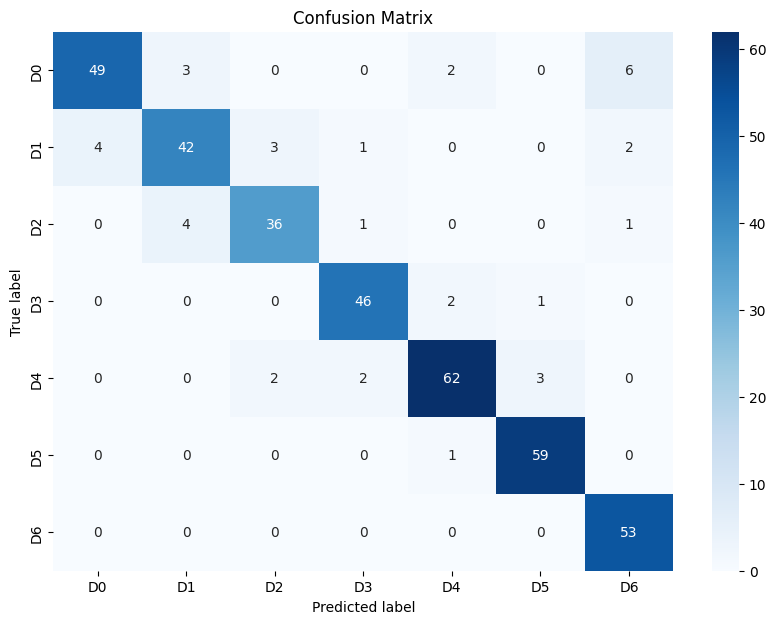

In [156]:
best_clf = XGBClassifier(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall, dfs = evaluate_my_model(best_clf, grid_search, X, y, RANDOM_STATE)

In [157]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(grid_search.best_index_)
for df in dfs:
    # Replace the dictionary values with list
    display(df)
    pd_to_latex(df)

Accuracy: 0.9012987012987013
F1 Score: 0.900199806977554
Precision: 0.9022048039926235
Recall: 0.9012987012987013
19


,"learning_rate,max_depth,n_estimators",accuracy_D0,accuracy_D0_std,f1_D0,f1_D0_std,precision_D0,precision_D0_std,recall_D0,recall_D0_std
0,"0.01,10,100",0.980475,0.005416,0.919539,0.023559,0.915317,0.017358,0.925178,0.044916
1,"0.01,10,150",0.980473,0.004583,0.919297,0.020952,0.915671,0.016028,0.925178,0.051008
2,"0.01,10,200",0.981776,0.004848,0.924966,0.020984,0.922233,0.032701,0.930583,0.048568
3,"0.01,15,100",0.980475,0.005416,0.919539,0.023559,0.915317,0.017358,0.925178,0.044916
4,"0.01,15,150",0.979821,0.004298,0.916899,0.019657,0.911281,0.021716,0.925178,0.051008
5,"0.01,15,200",0.981776,0.004848,0.924966,0.020984,0.922233,0.032701,0.930583,0.048568
6,"0.01,20,100",0.980475,0.005416,0.919539,0.023559,0.915317,0.017358,0.925178,0.044916
7,"0.01,20,150",0.979821,0.004298,0.916899,0.019657,0.911281,0.021716,0.925178,0.051008
8,"0.01,20,200",0.981776,0.004848,0.924966,0.020984,0.922233,0.032701,0.930583,0.048568
9,"0.01,25,100",0.980475,0.005416,0.919539,0.023559,0.915317,0.017358,0.925178,0.044916


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D0 & accuracy D0 std & f1 D0 & f1 D0 std & precision D0 & precision D0 std & recall D0 & recall D0 std \\
\midrule
0 & 0.01,10,100 & 0.980 & 0.005 & 0.920 & 0.024 & 0.915 & 0.017 & 0.925 & 0.045 \\
1 & 0.01,10,150 & 0.980 & 0.005 & 0.919 & 0.021 & 0.916 & 0.016 & 0.925 & 0.051 \\
2 & 0.01,10,200 & 0.982 & 0.005 & 0.925 & 0.021 & 0.922 & 0.033 & 0.931 & 0.049 \\
3 & 0.01,15,100 & 0.980 & 0.005 & 0.920 & 0.024 & 0.915 & 0.017 & 0.925 & 0.045 \\
4 & 0.01,15,150 & 0.980 & \textbf{0.004} & 0.917 & 0.020 & 0.911 & 0.022 & 0.925 & 0.051 \\
5 & 0.01,15,200 & 0.982 & 0.005 & 0.925 & 0.021 & 0.922 & 0.033 & 0.931 & 0.049 \\
6 & 0.01,20,100 & 0.980 & 0.005 & 0.920 & 0.024 & 0.915 & 0.017 & 0.925 & 0.045 \\
7 & 0.01,20,150 & 0.980 & \textbf{0.004} & 0.917 & 0.020 & 0.911 & 0.022 & 0.925 & 0.051 \\
8 & 0.01,20,200 & 0

,"learning_rate,max_depth,n_estimators",accuracy_D1,accuracy_D1_std,f1_D1,f1_D1_std,precision_D1,precision_D1_std,recall_D1,recall_D1_std
0,"0.01,10,100",0.944006,0.008370,0.789849,0.025848,0.817267,0.056819,0.766667,0.023328
1,"0.01,10,150",0.947255,0.010820,0.803035,0.039107,0.821945,0.046147,0.785714,0.039841
2,"0.01,10,200",0.947910,0.008013,0.806997,0.027665,0.819677,0.037922,0.795238,0.024281
3,"0.01,15,100",0.943356,0.009367,0.787048,0.029724,0.815854,0.058275,0.761905,0.015058
4,"0.01,15,150",0.944655,0.005877,0.793331,0.019518,0.812605,0.035296,0.776190,0.024281
5,"0.01,15,200",0.946609,0.007628,0.802282,0.025305,0.815113,0.039460,0.790476,0.017817
6,"0.01,20,100",0.943356,0.009367,0.787048,0.029724,0.815854,0.058275,0.761905,0.015058
7,"0.01,20,150",0.944655,0.005877,0.793331,0.019518,0.812605,0.035296,0.776190,0.024281
8,"0.01,20,200",0.946609,0.007628,0.802282,0.025305,0.815113,0.039460,0.790476,0.017817
9,"0.01,25,100",0.943356,0.009367,0.787048,0.029724,0.815854,0.058275,0.761905,0.015058


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D1 & accuracy D1 std & f1 D1 & f1 D1 std & precision D1 & precision D1 std & recall D1 & recall D1 std \\
\midrule
0 & 0.01,10,100 & 0.944 & 0.008 & 0.790 & 0.026 & 0.817 & 0.057 & 0.767 & 0.023 \\
1 & 0.01,10,150 & 0.947 & 0.011 & 0.803 & 0.039 & 0.822 & 0.046 & 0.786 & 0.040 \\
2 & 0.01,10,200 & 0.948 & 0.008 & 0.807 & 0.028 & 0.820 & 0.038 & 0.795 & 0.024 \\
3 & 0.01,15,100 & 0.943 & 0.009 & 0.787 & 0.030 & 0.816 & 0.058 & 0.762 & \textbf{0.015} \\
4 & 0.01,15,150 & 0.945 & \textbf{0.006} & 0.793 & \textbf{0.02} & 0.813 & \textbf{0.035} & 0.776 & 0.024 \\
5 & 0.01,15,200 & 0.947 & 0.008 & 0.802 & 0.025 & 0.815 & 0.039 & 0.790 & 0.018 \\
6 & 0.01,20,100 & 0.943 & 0.009 & 0.787 & 0.030 & 0.816 & 0.058 & 0.762 & \textbf{0.015} \\
7 & 0.01,20,150 & 0.945 & \textbf{0.006} & 0.793 & \textbf{0.02} & 0.813 & \

,"learning_rate,max_depth,n_estimators",accuracy_D2,accuracy_D2_std,f1_D2,f1_D2_std,precision_D2,precision_D2_std,recall_D2,recall_D2_std
0,"0.01,10,100",0.944010,0.011361,0.799813,0.043789,0.801456,0.035404,0.801057,0.071001
1,"0.01,10,150",0.945311,0.012090,0.801808,0.046646,0.814428,0.040947,0.791543,0.066097
2,"0.01,10,200",0.947917,0.011094,0.811590,0.041151,0.824942,0.042833,0.800846,0.058320
3,"0.01,15,100",0.943361,0.011011,0.797808,0.043632,0.796721,0.025799,0.801057,0.071001
4,"0.01,15,150",0.944010,0.010786,0.797328,0.041168,0.809795,0.036463,0.787104,0.061068
5,"0.01,15,200",0.947267,0.009956,0.809700,0.037326,0.820805,0.036809,0.800951,0.056075
6,"0.01,20,100",0.943361,0.011011,0.797808,0.043632,0.796721,0.025799,0.801057,0.071001
7,"0.01,20,150",0.944010,0.010786,0.797328,0.041168,0.809795,0.036463,0.787104,0.061068
8,"0.01,20,200",0.947267,0.009956,0.809700,0.037326,0.820805,0.036809,0.800951,0.056075
9,"0.01,25,100",0.943361,0.011011,0.797808,0.043632,0.796721,0.025799,0.801057,0.071001


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D2 & accuracy D2 std & f1 D2 & f1 D2 std & precision D2 & precision D2 std & recall D2 & recall D2 std \\
\midrule
0 & 0.01,10,100 & 0.944 & 0.011 & 0.800 & 0.044 & 0.801 & 0.035 & 0.801 & 0.071 \\
1 & 0.01,10,150 & 0.945 & 0.012 & 0.802 & 0.047 & 0.814 & 0.041 & 0.792 & 0.066 \\
2 & 0.01,10,200 & 0.948 & 0.011 & 0.812 & 0.041 & 0.825 & 0.043 & 0.801 & 0.058 \\
3 & 0.01,15,100 & 0.943 & 0.011 & 0.798 & 0.044 & 0.797 & \textbf{0.026} & 0.801 & 0.071 \\
4 & 0.01,15,150 & 0.944 & 0.011 & 0.797 & 0.041 & 0.810 & 0.036 & 0.787 & 0.061 \\
5 & 0.01,15,200 & 0.947 & \textbf{0.01} & 0.810 & \textbf{0.037} & 0.821 & 0.037 & 0.801 & 0.056 \\
6 & 0.01,20,100 & 0.943 & 0.011 & 0.798 & 0.044 & 0.797 & \textbf{0.026} & 0.801 & 0.071 \\
7 & 0.01,20,150 & 0.944 & 0.011 & 0.797 & 0.041 & 0.810 & 0.036 & 0.787 & 0.061 \\
8 

,"learning_rate,max_depth,n_estimators",accuracy_D3,accuracy_D3_std,f1_D3,f1_D3_std,precision_D3,precision_D3_std,recall_D3,recall_D3_std
0,"0.01,10,100",0.953776,0.008345,0.837430,0.024635,0.850343,0.052571,0.827273,0.023177
1,"0.01,10,150",0.955078,0.006953,0.840347,0.020742,0.861400,0.048979,0.822727,0.026504
2,"0.01,10,200",0.958983,0.003922,0.853349,0.010447,0.878098,0.037431,0.831818,0.023177
3,"0.01,15,100",0.954427,0.008980,0.839496,0.026559,0.854958,0.057509,0.827273,0.023177
4,"0.01,15,150",0.954431,0.006801,0.837423,0.022438,0.860037,0.044785,0.818182,0.032141
5,"0.01,15,200",0.960286,0.003197,0.857894,0.008871,0.882643,0.033848,0.836364,0.026504
6,"0.01,20,100",0.954427,0.008980,0.839496,0.026559,0.854958,0.057509,0.827273,0.023177
7,"0.01,20,150",0.954431,0.006801,0.837423,0.022438,0.860037,0.044785,0.818182,0.032141
8,"0.01,20,200",0.960286,0.003197,0.857894,0.008871,0.882643,0.033848,0.836364,0.026504
9,"0.01,25,100",0.954427,0.008980,0.839496,0.026559,0.854958,0.057509,0.827273,0.023177


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D3 & accuracy D3 std & f1 D3 & f1 D3 std & precision D3 & precision D3 std & recall D3 & recall D3 std \\
\midrule
0 & 0.01,10,100 & 0.954 & 0.008 & 0.837 & 0.025 & 0.850 & 0.053 & 0.827 & 0.023 \\
1 & 0.01,10,150 & 0.955 & 0.007 & 0.840 & 0.021 & 0.861 & 0.049 & 0.823 & 0.027 \\
2 & 0.01,10,200 & 0.959 & 0.004 & 0.853 & 0.010 & 0.878 & 0.037 & 0.832 & 0.023 \\
3 & 0.01,15,100 & 0.954 & 0.009 & 0.839 & 0.027 & 0.855 & 0.058 & 0.827 & 0.023 \\
4 & 0.01,15,150 & 0.954 & 0.007 & 0.837 & 0.022 & 0.860 & 0.045 & 0.818 & 0.032 \\
5 & 0.01,15,200 & 0.960 & 0.003 & 0.858 & 0.009 & 0.883 & 0.034 & 0.836 & 0.027 \\
6 & 0.01,20,100 & 0.954 & 0.009 & 0.839 & 0.027 & 0.855 & 0.058 & 0.827 & 0.023 \\
7 & 0.01,20,150 & 0.954 & 0.007 & 0.837 & 0.022 & 0.860 & 0.045 & 0.818 & 0.032 \\
8 & 0.01,20,200 & 0.960 & 0.003 & 0.8

,"learning_rate,max_depth,n_estimators",accuracy_D4,accuracy_D4_std,f1_D4,f1_D4_std,precision_D4,precision_D4_std,recall_D4,recall_D4_std
0,"0.01,10,100",0.957031,0.015196,0.868160,0.046508,0.873603,0.062902,0.868235,0.070215
1,"0.01,10,150",0.957684,0.011646,0.873070,0.033717,0.862056,0.054956,0.888235,0.048587
2,"0.01,10,200",0.960290,0.011892,0.880122,0.034318,0.876412,0.060127,0.888235,0.048587
3,"0.01,15,100",0.957031,0.015196,0.868160,0.046508,0.873603,0.062902,0.868235,0.070215
4,"0.01,15,150",0.957684,0.011646,0.873070,0.033717,0.862056,0.054956,0.888235,0.048587
5,"0.01,15,200",0.960942,0.010884,0.881586,0.032789,0.878409,0.051850,0.888235,0.048587
6,"0.01,20,100",0.957031,0.015196,0.868160,0.046508,0.873603,0.062902,0.868235,0.070215
7,"0.01,20,150",0.957684,0.011646,0.873070,0.033717,0.862056,0.054956,0.888235,0.048587
8,"0.01,20,200",0.960942,0.010884,0.881586,0.032789,0.878409,0.051850,0.888235,0.048587
9,"0.01,25,100",0.957031,0.015196,0.868160,0.046508,0.873603,0.062902,0.868235,0.070215


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D4 & accuracy D4 std & f1 D4 & f1 D4 std & precision D4 & precision D4 std & recall D4 & recall D4 std \\
\midrule
0 & 0.01,10,100 & 0.957 & 0.015 & 0.868 & 0.047 & 0.874 & 0.063 & 0.868 & 0.070 \\
1 & 0.01,10,150 & 0.958 & 0.012 & 0.873 & 0.034 & 0.862 & 0.055 & 0.888 & 0.049 \\
2 & 0.01,10,200 & 0.960 & 0.012 & 0.880 & 0.034 & 0.876 & 0.060 & 0.888 & 0.049 \\
3 & 0.01,15,100 & 0.957 & 0.015 & 0.868 & 0.047 & 0.874 & 0.063 & 0.868 & 0.070 \\
4 & 0.01,15,150 & 0.958 & 0.012 & 0.873 & 0.034 & 0.862 & 0.055 & 0.888 & 0.049 \\
5 & 0.01,15,200 & 0.961 & 0.011 & 0.882 & 0.033 & 0.878 & 0.052 & 0.888 & 0.049 \\
6 & 0.01,20,100 & 0.957 & 0.015 & 0.868 & 0.047 & 0.874 & 0.063 & 0.868 & 0.070 \\
7 & 0.01,20,150 & 0.958 & 0.012 & 0.873 & 0.034 & 0.862 & 0.055 & 0.888 & 0.049 \\
8 & 0.01,20,200 & 0.961 & 0.011 & 0.8

,"learning_rate,max_depth,n_estimators",accuracy_D5,accuracy_D5_std,f1_D5,f1_D5_std,precision_D5,precision_D5_std,recall_D5,recall_D5_std
0,"0.01,10,100",0.978521,0.008868,0.923228,0.031740,0.905434,0.040908,0.942857,0.035635
1,"0.01,10,150",0.977865,0.006954,0.919846,0.026456,0.907461,0.019786,0.933333,0.040963
2,"0.01,10,200",0.977218,0.006815,0.918417,0.024420,0.900383,0.030041,0.938095,0.032297
3,"0.01,15,100",0.977869,0.007800,0.920931,0.028022,0.900893,0.033368,0.942857,0.035635
4,"0.01,15,150",0.977865,0.006954,0.919846,0.026456,0.907461,0.019786,0.933333,0.040963
5,"0.01,15,200",0.977218,0.006815,0.918417,0.024420,0.900383,0.030041,0.938095,0.032297
6,"0.01,20,100",0.977869,0.007800,0.920931,0.028022,0.900893,0.033368,0.942857,0.035635
7,"0.01,20,150",0.977865,0.006954,0.919846,0.026456,0.907461,0.019786,0.933333,0.040963
8,"0.01,20,200",0.977218,0.006815,0.918417,0.024420,0.900383,0.030041,0.938095,0.032297
9,"0.01,25,100",0.977869,0.007800,0.920931,0.028022,0.900893,0.033368,0.942857,0.035635


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D5 & accuracy D5 std & f1 D5 & f1 D5 std & precision D5 & precision D5 std & recall D5 & recall D5 std \\
\midrule
0 & 0.01,10,100 & 0.979 & 0.009 & 0.923 & 0.032 & 0.905 & 0.041 & 0.943 & 0.036 \\
1 & 0.01,10,150 & 0.978 & 0.007 & 0.920 & 0.026 & 0.907 & \textbf{0.02} & 0.933 & 0.041 \\
2 & 0.01,10,200 & 0.977 & 0.007 & 0.918 & 0.024 & 0.900 & 0.030 & 0.938 & 0.032 \\
3 & 0.01,15,100 & 0.978 & 0.008 & 0.921 & 0.028 & 0.901 & 0.033 & 0.943 & 0.036 \\
4 & 0.01,15,150 & 0.978 & 0.007 & 0.920 & 0.026 & 0.907 & \textbf{0.02} & 0.933 & 0.041 \\
5 & 0.01,15,200 & 0.977 & 0.007 & 0.918 & 0.024 & 0.900 & 0.030 & 0.938 & 0.032 \\
6 & 0.01,20,100 & 0.978 & 0.008 & 0.921 & 0.028 & 0.901 & 0.033 & 0.943 & 0.036 \\
7 & 0.01,20,150 & 0.978 & 0.007 & 0.920 & 0.026 & 0.907 & \textbf{0.02} & 0.933 & 0.041 \\
8 & 0.01,20,2

,"learning_rate,max_depth,n_estimators",accuracy_D6,accuracy_D6_std,f1_D6,f1_D6_std,precision_D6,precision_D6_std,recall_D6,recall_D6_std
0,"0.01,10,100",0.993492,0.006177,0.979832,0.018921,0.968887,0.035050,0.991752,0.010103
1,"0.01,10,150",0.994141,0.005970,0.981936,0.018178,0.969050,0.035006,0.995918,0.008163
2,"0.01,10,200",0.994141,0.005970,0.981936,0.018178,0.969050,0.035006,0.995918,0.008163
3,"0.01,15,100",0.993492,0.006177,0.979832,0.018921,0.968887,0.035050,0.991752,0.010103
4,"0.01,15,150",0.994141,0.005970,0.981936,0.018178,0.969050,0.035006,0.995918,0.008163
5,"0.01,15,200",0.994141,0.005970,0.981936,0.018178,0.969050,0.035006,0.995918,0.008163
6,"0.01,20,100",0.993492,0.006177,0.979832,0.018921,0.968887,0.035050,0.991752,0.010103
7,"0.01,20,150",0.994141,0.005970,0.981936,0.018178,0.969050,0.035006,0.995918,0.008163
8,"0.01,20,200",0.994141,0.005970,0.981936,0.018178,0.969050,0.035006,0.995918,0.008163
9,"0.01,25,100",0.993492,0.006177,0.979832,0.018921,0.968887,0.035050,0.991752,0.010103


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & learning rate,max depth,n estimators & accuracy D6 & accuracy D6 std & f1 D6 & f1 D6 std & precision D6 & precision D6 std & recall D6 & recall D6 std \\
\midrule
0 & 0.01,10,100 & 0.993 & 0.006 & 0.980 & 0.019 & 0.969 & 0.035 & 0.992 & 0.010 \\
1 & 0.01,10,150 & 0.994 & 0.006 & 0.982 & 0.018 & 0.969 & 0.035 & \textbf{0.996} & \textbf{0.008} \\
2 & 0.01,10,200 & 0.994 & 0.006 & 0.982 & 0.018 & 0.969 & 0.035 & \textbf{0.996} & \textbf{0.008} \\
3 & 0.01,15,100 & 0.993 & 0.006 & 0.980 & 0.019 & 0.969 & 0.035 & 0.992 & 0.010 \\
4 & 0.01,15,150 & 0.994 & 0.006 & 0.982 & 0.018 & 0.969 & 0.035 & \textbf{0.996} & \textbf{0.008} \\
5 & 0.01,15,200 & 0.994 & 0.006 & 0.982 & 0.018 & 0.969 & 0.035 & \textbf{0.996} & \textbf{0.008} \\
6 & 0.01,20,100 & 0.993 & 0.006 & 0.980 & 0.019 & 0.969 & 0.035 & 0.992 & 0.010 \\
7 & 0.01,20,150 & 0.994 & 0.006 & 0.982 & 0.018 

In [158]:
from sklearn.svm import SVC

# Initialize a SVC
clf = SVC(random_state=RANDOM_STATE)

# Define the parameter grid
param_grid = {
    'C': [0.1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

X, y = prepare_dataset()
grid_serach, best_params = find_best_params(clf, param_grid, X, y, RANDOM_STATE)


Features removed: {'Smoker', 'Calorie_monitoring'}
Features removed: {'Sedentary_hours_daily', 'Est_avg_calorie_intake'}
Best parameters found:  {'C': 100, 'kernel': 'rbf'}


Model: SVC
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy',
       ...
       'std_test_recall_D5', 'rank_test_recall_D5', 'split0_test_recall_D6',
       'split1_test_recall_D6', 'split2_test_recall_D6',
       'split3_test_recall_D6', 'split4_test_recall_D6', 'mean_test_recall_D6',
       'std_test_recall_D6', 'rank_test_recall_D6'],
      dtype='object', length=263)
              precision    recall  f1-score   support

          D0       0.88      0.75      0.81        60
          D1       0.65      0.75      0.70        52
          D2       0.79      0.74      0.77        42
          D3       0.83      0.88      0.85        49
          D4       0.90      0.87      0.88        69
          D5       0.90      0.93      0.92        60
          D6       0.96      0.98      0.97        53

    accuracy                           0.85

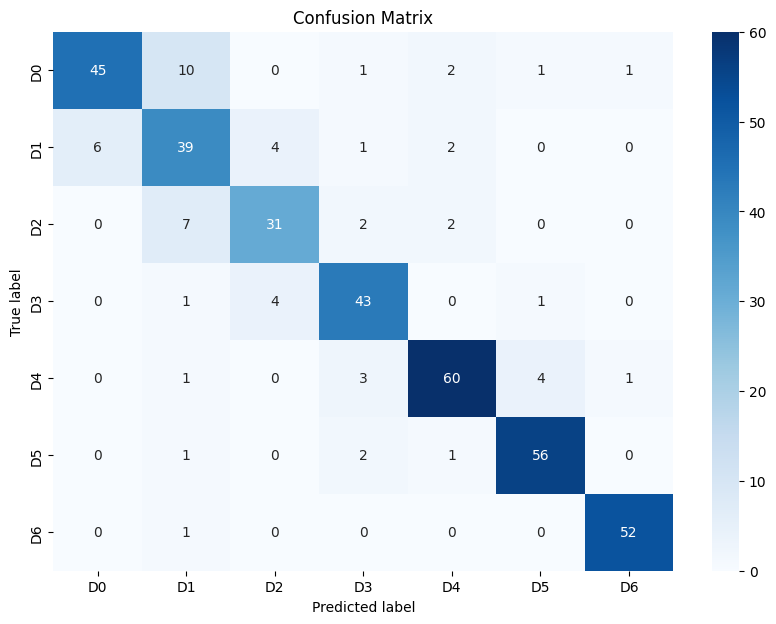

In [159]:
best_clf = SVC(**best_params, random_state=RANDOM_STATE)
accuracy, f1, precision, recall, dfs = evaluate_my_model(best_clf, grid_serach, X, y, RANDOM_STATE)

In [160]:
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(grid_search.best_index_)
for df in dfs:
    # Replace the dictionary values with list
    display(df)
    pd_to_latex(df)

Accuracy: 0.8467532467532467
F1 Score: 0.8473043990498447
Precision: 0.8510822151290588
Recall: 0.8467532467532467
19


,"C,kernel",accuracy_D0,accuracy_D0_std,f1_D0,f1_D0_std,precision_D0,precision_D0_std,recall_D0,recall_D0_std
0,"0.1,rbf",0.928381,0.011858,0.633622,0.083893,0.819331,0.061547,0.521479,0.094239
1,"0.1,poly",0.939458,0.014631,0.696724,0.096075,0.870612,0.082941,0.597582,0.136540
2,"0.1,sigmoid",0.904952,0.008550,0.612029,0.046228,0.603226,0.025647,0.623898,0.074956
3,"10,rbf",0.977211,0.009218,0.906627,0.037919,0.904199,0.062976,0.914367,0.061555
4,"10,poly",0.975908,0.011023,0.902937,0.038364,0.902680,0.078831,0.908819,0.035841
5,"10,sigmoid",0.810550,0.017849,0.417086,0.061372,0.332433,0.044821,0.564865,0.110910
6,"100,rbf",0.981120,0.007253,0.922487,0.029621,0.918908,0.051437,0.930583,0.056881
7,"100,poly",0.978516,0.009348,0.913110,0.035878,0.903498,0.054976,0.925036,0.034685
8,"100,sigmoid",0.802748,0.027426,0.401598,0.083216,0.317903,0.065816,0.548791,0.125408
9,"200,rbf",0.981120,0.007253,0.922487,0.029621,0.918908,0.051437,0.930583,0.056881


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D0 & accuracy D0 std & f1 D0 & f1 D0 std & precision D0 & precision D0 std & recall D0 & recall D0 std \\
\midrule
0 & 0.1,rbf & 0.928 & 0.012 & 0.634 & 0.084 & 0.819 & 0.062 & 0.521 & 0.094 \\
1 & 0.1,poly & 0.939 & 0.015 & 0.697 & 0.096 & 0.871 & 0.083 & 0.598 & 0.137 \\
2 & 0.1,sigmoid & 0.905 & 0.009 & 0.612 & 0.046 & 0.603 & \textbf{0.026} & 0.624 & 0.075 \\
3 & 10,rbf & 0.977 & 0.009 & 0.907 & 0.038 & 0.904 & 0.063 & 0.914 & 0.062 \\
4 & 10,poly & 0.976 & 0.011 & 0.903 & 0.038 & 0.903 & 0.079 & 0.909 & 0.036 \\
5 & 10,sigmoid & 0.811 & 0.018 & 0.417 & 0.061 & 0.332 & 0.045 & 0.565 & 0.111 \\
6 & 100,rbf & \textbf{0.981} & 0.007 & \textbf{0.922} & 0.030 & \textbf{0.919} & 0.051 & \textbf{0.931} & 0.057 \\
7 & 100,poly & 0.979 & 0.009 & 0.913 & 0.036 & 0.903 & 0.055 & 0.925 & \textbf{0.035} \\
8 & 100,sigmoid & 0.803 & 0.027 & 0

,"C,kernel",accuracy_D1,accuracy_D1_std,f1_D1,f1_D1_std,precision_D1,precision_D1_std,recall_D1,recall_D1_std
0,"0.1,rbf",0.847659,0.023053,0.535644,0.056722,0.463612,0.065861,0.638095,0.053026
1,"0.1,poly",0.884756,0.016358,0.502244,0.081785,0.608771,0.081861,0.428571,0.079682
2,"0.1,sigmoid",0.843754,0.024085,0.393326,0.075820,0.427480,0.107991,0.366667,0.057538
3,"10,rbf",0.925760,0.018056,0.729287,0.067155,0.726040,0.059211,0.738095,0.099887
4,"10,poly",0.910144,0.014421,0.639640,0.062140,0.706285,0.060487,0.585714,0.068346
5,"10,sigmoid",0.813793,0.021912,0.315623,0.079613,0.320019,0.059035,0.323810,0.115274
6,"100,rbf",0.927717,0.018168,0.736323,0.070216,0.733176,0.066756,0.747619,0.112284
7,"100,poly",0.910148,0.025221,0.649739,0.104121,0.693007,0.105721,0.614286,0.111066
8,"100,sigmoid",0.825515,0.022383,0.300174,0.078524,0.338525,0.074572,0.280952,0.101463
9,"200,rbf",0.927717,0.018168,0.736323,0.070216,0.733176,0.066756,0.747619,0.112284


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D1 & accuracy D1 std & f1 D1 & f1 D1 std & precision D1 & precision D1 std & recall D1 & recall D1 std \\
\midrule
0 & 0.1,rbf & 0.848 & 0.023 & 0.536 & \textbf{0.057} & 0.464 & 0.066 & 0.638 & \textbf{0.053} \\
1 & 0.1,poly & 0.885 & 0.016 & 0.502 & 0.082 & 0.609 & 0.082 & 0.429 & 0.080 \\
2 & 0.1,sigmoid & 0.844 & 0.024 & 0.393 & 0.076 & 0.427 & 0.108 & 0.367 & 0.058 \\
3 & 10,rbf & 0.926 & 0.018 & 0.729 & 0.067 & 0.726 & 0.059 & 0.738 & 0.100 \\
4 & 10,poly & 0.910 & 0.014 & 0.640 & 0.062 & 0.706 & 0.060 & 0.586 & 0.068 \\
5 & 10,sigmoid & 0.814 & 0.022 & 0.316 & 0.080 & 0.320 & 0.059 & 0.324 & 0.115 \\
6 & 100,rbf & \textbf{0.928} & 0.018 & \textbf{0.736} & 0.070 & \textbf{0.733} & 0.067 & \textbf{0.748} & 0.112 \\
7 & 100,poly & 0.910 & 0.025 & 0.650 & 0.104 & 0.693 & 0.106 & 0.614 & 0.111 \\
8 & 100,sigmoid & 0.826 & 0.022 & 0

,"C,kernel",accuracy_D2,accuracy_D2_std,f1_D2,f1_D2_std,precision_D2,precision_D2_std,recall_D2,recall_D2_std
0,"0.1,rbf",0.873045,0.014143,0.476203,0.078155,0.560988,0.053745,0.416808,0.091198
1,"0.1,poly",0.876304,0.010276,0.355929,0.071278,0.657760,0.075753,0.245772,0.057311
2,"0.1,sigmoid",0.868499,0.018761,0.469992,0.100617,0.531818,0.066635,0.426110,0.126697
3,"10,rbf",0.938132,0.019791,0.781517,0.067557,0.783986,0.088454,0.782664,0.070417
4,"10,poly",0.910157,0.013121,0.700763,0.043905,0.660743,0.043834,0.749789,0.067056
5,"10,sigmoid",0.833988,0.016567,0.264715,0.032073,0.371970,0.053791,0.217865,0.060629
6,"100,rbf",0.941391,0.020316,0.792759,0.063643,0.804384,0.100193,0.787315,0.061820
7,"100,poly",0.923819,0.019421,0.733210,0.064454,0.727178,0.076153,0.740803,0.059221
8,"100,sigmoid",0.839845,0.023604,0.277040,0.039780,0.409045,0.092636,0.217865,0.038892
9,"200,rbf",0.941391,0.020316,0.792759,0.063643,0.804384,0.100193,0.787315,0.061820


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D2 & accuracy D2 std & f1 D2 & f1 D2 std & precision D2 & precision D2 std & recall D2 & recall D2 std \\
\midrule
0 & 0.1,rbf & 0.873 & 0.014 & 0.476 & 0.078 & 0.561 & 0.054 & 0.417 & 0.091 \\
1 & 0.1,poly & 0.876 & 0.010 & 0.356 & 0.071 & 0.658 & 0.076 & 0.246 & 0.057 \\
2 & 0.1,sigmoid & 0.868 & 0.019 & 0.470 & 0.101 & 0.532 & 0.067 & 0.426 & 0.127 \\
3 & 10,rbf & 0.938 & 0.020 & 0.782 & 0.068 & 0.784 & 0.088 & 0.783 & 0.070 \\
4 & 10,poly & 0.910 & 0.013 & 0.701 & 0.044 & 0.661 & \textbf{0.044} & 0.750 & 0.067 \\
5 & 10,sigmoid & 0.834 & 0.017 & 0.265 & \textbf{0.032} & 0.372 & 0.054 & 0.218 & 0.061 \\
6 & 100,rbf & \textbf{0.941} & 0.020 & \textbf{0.793} & 0.064 & \textbf{0.804} & 0.100 & \textbf{0.787} & 0.062 \\
7 & 100,poly & 0.924 & 0.019 & 0.733 & 0.064 & 0.727 & 0.076 & 0.741 & 0.059 \\
8 & 100,sigmoid & 0.840 & 0.024 & 0

,"C,kernel",accuracy_D3,accuracy_D3_std,f1_D3,f1_D3_std,precision_D3,precision_D3_std,recall_D3,recall_D3_std
0,"0.1,rbf",0.862632,0.011708,0.320844,0.046349,0.570389,0.125594,0.227273,0.040656
1,"0.1,poly",0.889323,0.017602,0.498690,0.129953,0.705364,0.101936,0.413636,0.175692
2,"0.1,sigmoid",0.840492,0.015846,0.173315,0.054850,0.365657,0.159546,0.118182,0.041660
3,"10,rbf",0.947265,0.004327,0.809845,0.016693,0.841996,0.051640,0.786364,0.058564
4,"10,poly",0.918639,0.017482,0.712459,0.041106,0.738974,0.087836,0.695455,0.036927
5,"10,sigmoid",0.772169,0.027683,0.236995,0.061092,0.230569,0.061956,0.245455,0.061658
6,"100,rbf",0.945321,0.007171,0.807452,0.019816,0.822382,0.056953,0.800000,0.054545
7,"100,poly",0.927087,0.003243,0.736541,0.007664,0.769890,0.051510,0.713636,0.060302
8,"100,sigmoid",0.741556,0.038478,0.214955,0.074437,0.193880,0.061843,0.254545,0.118007
9,"200,rbf",0.945321,0.007171,0.807452,0.019816,0.822382,0.056953,0.800000,0.054545


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D3 & accuracy D3 std & f1 D3 & f1 D3 std & precision D3 & precision D3 std & recall D3 & recall D3 std \\
\midrule
0 & 0.1,rbf & 0.863 & 0.012 & 0.321 & 0.046 & 0.570 & 0.126 & 0.227 & 0.041 \\
1 & 0.1,poly & 0.889 & 0.018 & 0.499 & 0.130 & 0.705 & 0.102 & 0.414 & 0.176 \\
2 & 0.1,sigmoid & 0.840 & 0.016 & 0.173 & 0.055 & 0.366 & 0.160 & 0.118 & 0.042 \\
3 & 10,rbf & \textbf{0.947} & 0.004 & \textbf{0.81} & 0.017 & \textbf{0.842} & 0.052 & 0.786 & 0.059 \\
4 & 10,poly & 0.919 & 0.017 & 0.712 & 0.041 & 0.739 & 0.088 & 0.695 & \textbf{0.037} \\
5 & 10,sigmoid & 0.772 & 0.028 & 0.237 & 0.061 & 0.231 & 0.062 & 0.245 & 0.062 \\
6 & 100,rbf & 0.945 & 0.007 & 0.807 & 0.020 & 0.822 & 0.057 & \textbf{0.8} & 0.055 \\
7 & 100,poly & 0.927 & \textbf{0.003} & 0.737 & \textbf{0.008} & 0.770 & 0.052 & 0.714 & 0.060 \\
8 & 100,sigmoid & 0.742 & 0.0

,"C,kernel",accuracy_D4,accuracy_D4_std,f1_D4,f1_D4_std,precision_D4,precision_D4_std,recall_D4,recall_D4_std
0,"0.1,rbf",0.846360,0.008969,0.631971,0.025251,0.519327,0.016512,0.809176,0.056634
1,"0.1,poly",0.781234,0.040935,0.532993,0.036248,0.416765,0.039975,0.761725,0.110823
2,"0.1,sigmoid",0.832028,0.015536,0.530475,0.045153,0.488620,0.041019,0.581725,0.058846
3,"10,rbf",0.963543,0.009523,0.886494,0.030252,0.901159,0.027653,0.872627,0.036571
4,"10,poly",0.950529,0.013057,0.842807,0.045574,0.868745,0.021840,0.821098,0.075533
5,"10,sigmoid",0.793604,0.019648,0.260352,0.071155,0.314862,0.086461,0.222824,0.062376
6,"100,rbf",0.960942,0.007110,0.878367,0.022968,0.892890,0.015687,0.864706,0.033524
7,"100,poly",0.950527,0.007495,0.849402,0.024610,0.845797,0.036909,0.856863,0.057409
8,"100,sigmoid",0.781245,0.016074,0.231815,0.060279,0.271990,0.068701,0.202824,0.056601
9,"200,rbf",0.960942,0.007110,0.878367,0.022968,0.892890,0.015687,0.864706,0.033524


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D4 & accuracy D4 std & f1 D4 & f1 D4 std & precision D4 & precision D4 std & recall D4 & recall D4 std \\
\midrule
0 & 0.1,rbf & 0.846 & 0.009 & 0.632 & 0.025 & 0.519 & 0.017 & 0.809 & 0.057 \\
1 & 0.1,poly & 0.781 & 0.041 & 0.533 & 0.036 & 0.417 & 0.040 & 0.762 & 0.111 \\
2 & 0.1,sigmoid & 0.832 & 0.016 & 0.530 & 0.045 & 0.489 & 0.041 & 0.582 & 0.059 \\
3 & 10,rbf & \textbf{0.964} & 0.010 & \textbf{0.886} & 0.030 & \textbf{0.901} & 0.028 & \textbf{0.873} & 0.037 \\
4 & 10,poly & 0.951 & 0.013 & 0.843 & 0.046 & 0.869 & 0.022 & 0.821 & 0.076 \\
5 & 10,sigmoid & 0.794 & 0.020 & 0.260 & 0.071 & 0.315 & 0.086 & 0.223 & 0.062 \\
6 & 100,rbf & 0.961 & \textbf{0.007} & 0.878 & \textbf{0.023} & 0.893 & \textbf{0.016} & 0.865 & \textbf{0.034} \\
7 & 100,poly & 0.951 & \textbf{0.007} & 0.849 & 0.025 & 0.846 & 0.037 & 0.857 & 0.057 \\
8 & 100,

,"C,kernel",accuracy_D5,accuracy_D5_std,f1_D5,f1_D5_std,precision_D5,precision_D5_std,recall_D5,recall_D5_std
0,"0.1,rbf",0.948581,0.012524,0.823900,0.035679,0.786645,0.071539,0.871429,0.044160
1,"0.1,poly",0.904971,0.028322,0.733516,0.052342,0.617100,0.097323,0.928571,0.056344
2,"0.1,sigmoid",0.882821,0.021058,0.666807,0.040835,0.553147,0.062845,0.847619,0.028571
3,"10,rbf",0.979176,0.011177,0.926373,0.038960,0.902072,0.048234,0.952381,0.030117
4,"10,poly",0.973971,0.017809,0.910312,0.059545,0.877534,0.079911,0.947619,0.040963
5,"10,sigmoid",0.881505,0.022366,0.581821,0.068823,0.566201,0.076596,0.600000,0.066326
6,"100,rbf",0.979830,0.012894,0.927355,0.046330,0.917511,0.053786,0.938095,0.044160
7,"100,poly",0.970056,0.016134,0.895555,0.052505,0.868291,0.071384,0.928571,0.054294
8,"100,sigmoid",0.870443,0.016658,0.531172,0.043513,0.530837,0.065465,0.533333,0.024281
9,"200,rbf",0.979830,0.012894,0.927355,0.046330,0.917511,0.053786,0.938095,0.044160


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D5 & accuracy D5 std & f1 D5 & f1 D5 std & precision D5 & precision D5 std & recall D5 & recall D5 std \\
\midrule
0 & 0.1,rbf & 0.949 & 0.013 & 0.824 & 0.036 & 0.787 & 0.072 & 0.871 & 0.044 \\
1 & 0.1,poly & 0.905 & 0.028 & 0.734 & 0.052 & 0.617 & 0.097 & 0.929 & 0.056 \\
2 & 0.1,sigmoid & 0.883 & 0.021 & 0.667 & 0.041 & 0.553 & 0.063 & 0.848 & 0.029 \\
3 & 10,rbf & 0.979 & \textbf{0.011} & 0.926 & 0.039 & 0.902 & \textbf{0.048} & \textbf{0.952} & 0.030 \\
4 & 10,poly & 0.974 & 0.018 & 0.910 & 0.060 & 0.878 & 0.080 & 0.948 & 0.041 \\
5 & 10,sigmoid & 0.882 & 0.022 & 0.582 & 0.069 & 0.566 & 0.077 & 0.600 & 0.066 \\
6 & 100,rbf & \textbf{0.98} & 0.013 & \textbf{0.927} & 0.046 & \textbf{0.918} & 0.054 & 0.938 & 0.044 \\
7 & 100,poly & 0.970 & 0.016 & 0.896 & 0.053 & 0.868 & 0.071 & 0.929 & 0.054 \\
8 & 100,sigmoid & 0.870 & 0.017 & 0.

,"C,kernel",accuracy_D6,accuracy_D6_std,f1_D6,f1_D6_std,precision_D6,precision_D6_std,recall_D6,recall_D6_std
0,"0.1,rbf",0.994139,0.005972,0.981938,0.018304,0.968769,0.031359,0.995918,0.008163
1,"0.1,poly",0.990886,0.007254,0.972225,0.021449,0.950699,0.041766,0.995918,0.008163
2,"0.1,sigmoid",0.969406,0.009097,0.911918,0.024998,0.841881,0.041279,0.995918,0.008163
3,"10,rbf",0.998046,0.002606,0.993857,0.008174,0.992000,0.016000,0.995918,0.008163
4,"10,poly",0.993492,0.006177,0.979957,0.018851,0.965286,0.036746,0.995918,0.008163
5,"10,sigmoid",0.983726,0.002899,0.947552,0.010498,0.963095,0.022955,0.934269,0.037461
6,"100,rbf",0.998046,0.002606,0.993857,0.008174,0.992000,0.016000,0.995918,0.008163
7,"100,poly",0.993492,0.006177,0.979957,0.018851,0.965286,0.036746,0.995918,0.008163
8,"100,sigmoid",0.978523,0.006983,0.929259,0.024371,0.965110,0.028537,0.896939,0.035177
9,"200,rbf",0.998046,0.002606,0.993857,0.008174,0.992000,0.016000,0.995918,0.008163


\begin{table}
\caption{Comparison of ML Model Performance Metrics}
\label{tab:model_comparison}
\begin{tabular}{llllllllll}
\toprule
 & C,kernel & accuracy D6 & accuracy D6 std & f1 D6 & f1 D6 std & precision D6 & precision D6 std & recall D6 & recall D6 std \\
\midrule
0 & 0.1,rbf & 0.994 & 0.006 & 0.982 & 0.018 & 0.969 & 0.031 & \textbf{0.996} & \textbf{0.008} \\
1 & 0.1,poly & 0.991 & 0.007 & 0.972 & 0.021 & 0.951 & 0.042 & \textbf{0.996} & \textbf{0.008} \\
2 & 0.1,sigmoid & 0.969 & 0.009 & 0.912 & 0.025 & 0.842 & 0.041 & \textbf{0.996} & \textbf{0.008} \\
3 & 10,rbf & \textbf{0.998} & \textbf{0.003} & \textbf{0.994} & \textbf{0.008} & \textbf{0.992} & \textbf{0.016} & \textbf{0.996} & \textbf{0.008} \\
4 & 10,poly & 0.993 & 0.006 & 0.980 & 0.019 & 0.965 & 0.037 & \textbf{0.996} & \textbf{0.008} \\
5 & 10,sigmoid & 0.984 & \textbf{0.003} & 0.948 & 0.010 & 0.963 & 0.023 & 0.934 & 0.037 \\
6 & 100,rbf & \textbf{0.998} & \textbf{0.003} & \textbf{0.994} & \textbf{0.008} & \textbf{0.992